# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Научимся определять рыночную стоимость объектов недвижимости. Для этого проведем исследовательский анализ данных и установим параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: **она отследит аномалии и мошенническую деятельность**.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Изучение общей информации

**Описание данных**
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balconies` — число балконов (ранее `balcony`)
- `ceiling_height` — высота потолков (м)
- `city_centers_nearest` — расстояние до центра города (м) (ранее `cityCenters_nearest`)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `is_open_plan` — свободная планировка (булев тип) (ранее `open_plan`)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `is_studio` — квартира-студия (булев тип) (ранее `studio`)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

In [114]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import math
import warnings

warnings.simplefilter("ignore")

In [115]:
try:
    data = pd.read_csv('data/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# отсортируем названия столбцов по алфавиту для более удобного восприятия
data = data.reindex(sorted(data.columns), axis=1)
pd.set_option('display.max_columns', None)
data.head(10)

,airports_nearest,balcony,ceiling_height,cityCenters_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,rooms,studio,total_area,total_images
0,18863.0,NaN,2.70,16028.0,NaN,2019-03-07T00:00:00,8,16.0,NaN,25.00,13000000.0,51.00,Санкт-Петербург,False,1.0,482.0,2.0,755.0,3,False,108.00,20
1,12817.0,2.0,NaN,18603.0,81.0,2018-12-04T00:00:00,1,11.0,NaN,11.00,3350000.0,18.60,посёлок Шушары,False,0.0,NaN,0.0,NaN,1,False,40.40,7
2,21741.0,0.0,NaN,13933.0,558.0,2015-08-20T00:00:00,4,5.0,NaN,8.30,5196000.0,34.30,Санкт-Петербург,False,1.0,90.0,2.0,574.0,2,False,56.00,10
3,28098.0,0.0,NaN,6800.0,424.0,2015-07-24T00:00:00,9,14.0,NaN,NaN,64900000.0,NaN,Санкт-Петербург,False,2.0,84.0,3.0,234.0,3,False,159.00,0
4,31856.0,NaN,3.03,8098.0,121.0,2018-06-19T00:00:00,13,14.0,NaN,41.00,10000000.0,32.00,Санкт-Петербург,False,2.0,112.0,1.0,48.0,2,False,100.00,2
5,NaN,NaN,NaN,NaN,55.0,2018-09-10T00:00:00,5,12.0,NaN,9.10,2890000.0,14.40,городской посёлок Янино-1,False,NaN,NaN,NaN,NaN,1,False,30.40,10
6,52996.0,1.0,NaN,19143.0,155.0,2017-11-02T00:00:00,6,26.0,NaN,14.40,3700000.0,10.60,посёлок Парголово,False,0.0,NaN,0.0,NaN,1,False,37.30,6
7,23982.0,2.0,NaN,11634.0,NaN,2019-04-18T00:00:00,22,24.0,NaN,18.90,7915000.0,NaN,Санкт-Петербург,False,0.0,NaN,0.0,NaN,2,False,71.60,5
8,NaN,NaN,NaN,NaN,189.0,2018-05-23T00:00:00,26,27.0,NaN,8.81,2900000.0,15.43,посёлок Мурино,False,NaN,NaN,NaN,NaN,1,False,33.16,20
9,50898.0,2.0,2.50,15008.0,289.0,2017-02-26T00:00:00,7,9.0,NaN,6.50,5400000.0,43.60,Санкт-Петербург,False,0.0,NaN,0.0,NaN,3,False,61.00,18


Приведем названия столбцов к единому стилю

In [116]:
data.rename(columns={
    'balcony': 'balconies',
    'cityCenters_nearest': 'city_centers_nearest',
    'open_plan': 'is_open_plan',
    'studio': 'is_studio',
}, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   airports_nearest      18157 non-null  float64
 1   balconies             12180 non-null  float64
 2   ceiling_height        14504 non-null  float64
 3   city_centers_nearest  18180 non-null  float64
 4   days_exposition       20518 non-null  float64
 5   first_day_exposition  23699 non-null  object 
 6   floor                 23699 non-null  int64  
 7   floors_total          23613 non-null  float64
 8   is_apartment          2775 non-null   object 
 9   kitchen_area          21421 non-null  float64
 10  last_price            23699 non-null  float64
 11  living_area           21796 non-null  float64
 12  locality_name         23650 non-null  object 
 13  is_open_plan          23699 non-null  bool   
 14  parks_around3000      18181 non-null  float64
 15  parks_nearest      

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   airports_nearest      18157 non-null  float64
 1   balconies             12180 non-null  float64
 2   ceiling_height        14504 non-null  float64
 3   city_centers_nearest  18180 non-null  float64
 4   days_exposition       20518 non-null  float64
 5   first_day_exposition  23699 non-null  object 
 6   floor                 23699 non-null  int64  
 7   floors_total          23613 non-null  float64
 8   is_apartment          2775 non-null   object 
 9   kitchen_area          21421 non-null  float64
 10  last_price            23699 non-null  float64
 11  living_area           21796 non-null  float64
 12  locality_name         23650 non-null  object 
 13  is_open_plan          23699 non-null  bool   
 14  parks_around3000      18181 non-null  float64
 15  parks_nearest      

In [118]:
data.describe()

,airports_nearest,balconies,ceiling_height,city_centers_nearest,days_exposition,floor,floors_total,kitchen_area,last_price,living_area,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,rooms,total_area,total_images
count,18157.000000,12180.000000,14504.000000,18180.000000,20518.000000,23699.000000,23613.000000,21421.000000,2.369900e+04,21796.000000,18181.000000,8079.000000,18181.000000,9110.000000,23699.000000,23699.000000,23699.000000
mean,28793.672193,1.150082,2.771499,14191.277833,180.888634,5.892358,10.673824,10.569807,6.541549e+06,34.457852,0.611408,490.804555,0.770255,517.980900,2.070636,60.348651,9.858475
std,12630.880622,1.071300,1.261056,8608.386210,219.727988,4.885249,6.597173,5.905438,1.088701e+07,22.030445,0.802074,342.317995,0.938346,277.720643,1.078405,35.654083,5.682529
min,0.000000,0.000000,1.000000,181.000000,1.000000,1.000000,1.000000,1.300000,1.219000e+04,2.000000,0.000000,1.000000,0.000000,13.000000,0.000000,12.000000,0.000000
25%,18585.000000,0.000000,2.520000,9238.000000,45.000000,2.000000,5.000000,7.000000,3.400000e+06,18.600000,0.000000,288.000000,0.000000,294.000000,1.000000,40.000000,6.000000
50%,26726.000000,1.000000,2.650000,13098.500000,95.000000,4.000000,9.000000,9.100000,4.650000e+06,30.000000,0.000000,455.000000,1.000000,502.000000,2.000000,52.000000,9.000000
75%,37273.000000,2.000000,2.800000,16293.000000,232.000000,8.000000,16.000000,12.000000,6.800000e+06,42.300000,1.000000,612.000000,1.000000,729.000000,3.000000,69.900000,14.000000
max,84869.000000,5.000000,100.000000,65968.000000,1580.000000,33.000000,60.000000,112.000000,7.630000e+08,409.700000,3.000000,3190.000000,3.000000,1344.000000,19.000000,900.000000,50.000000


### Построение графиков

Построим гистограммы, чтобы посмотреть, как распределены данные

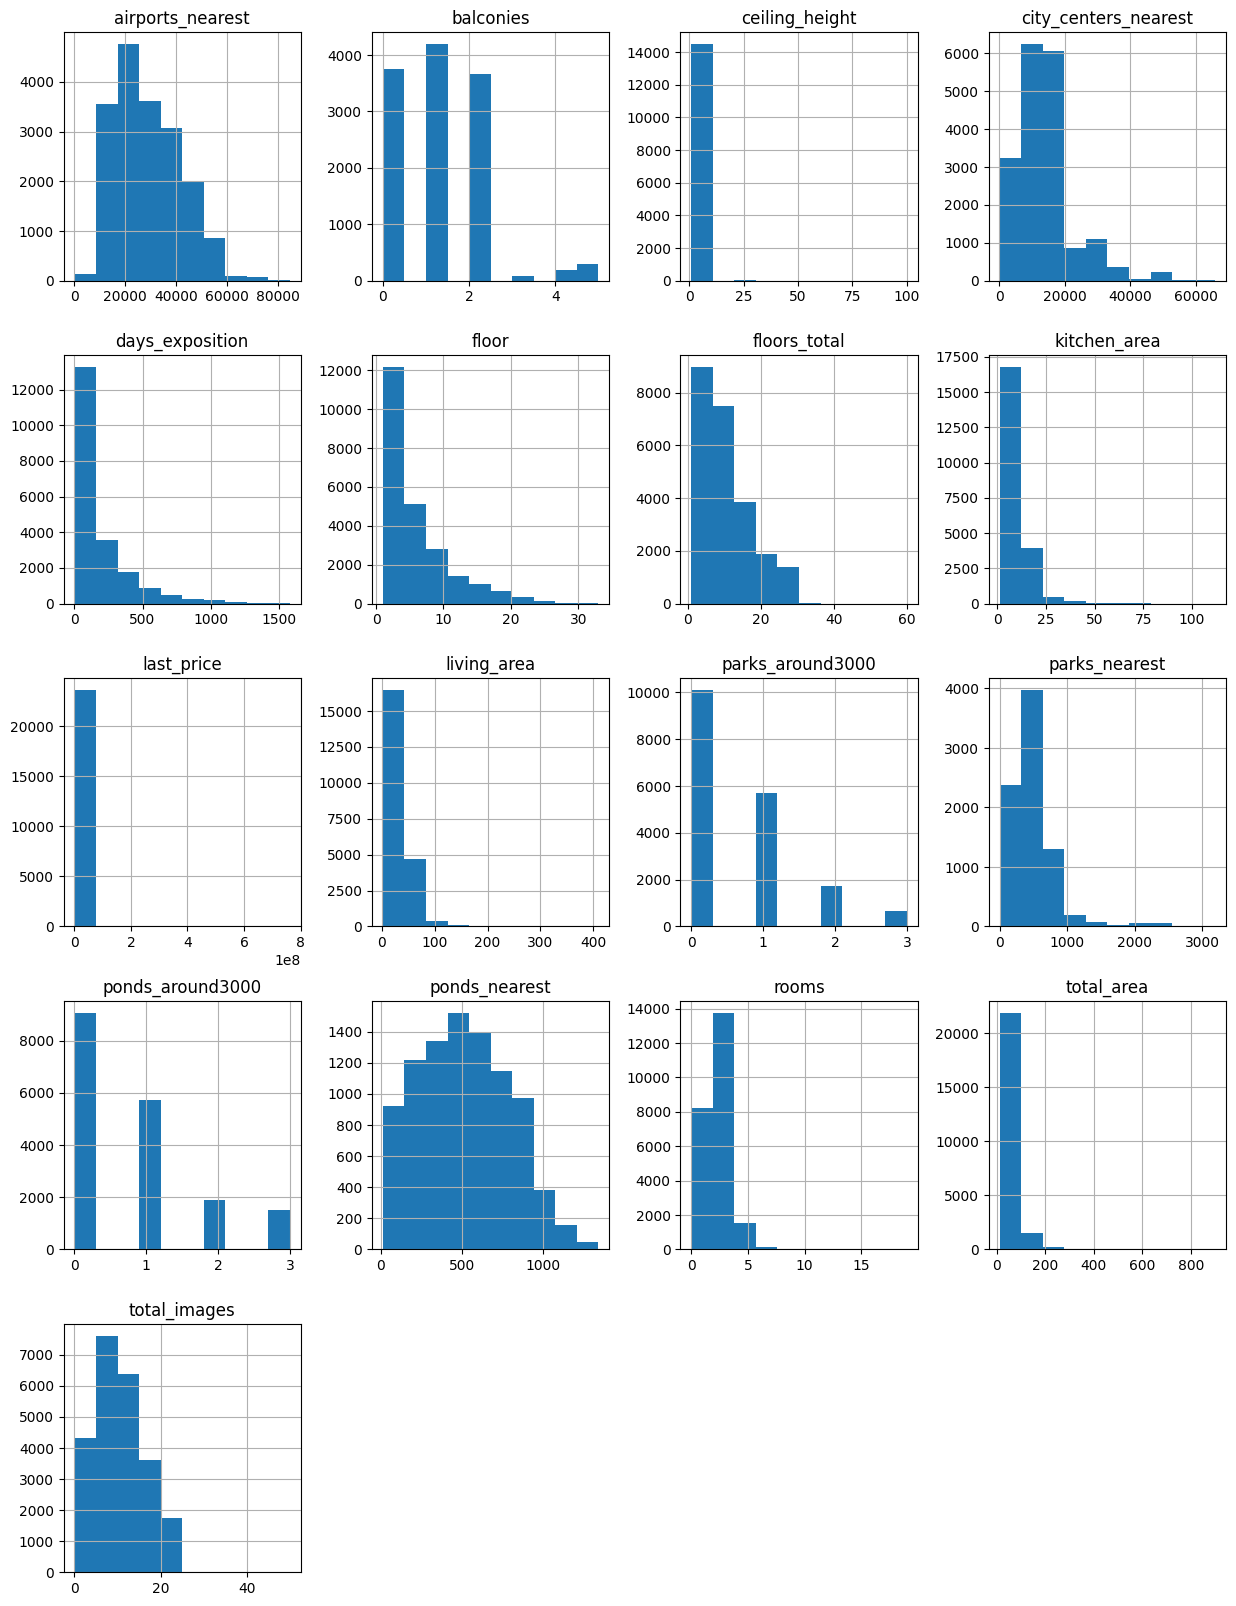

In [119]:
data.hist(figsize=(15, 20))
plt.show()

На первый взгляд большинство данных выглядят правдоподобно, однако в некоторых данных есть выбросы около нуля
<br>
1. `celling_height`
<br>
Возможные причины:
- Владелец не посчитал данную метрику важной
- Высота потолка стандартная для квартир в стране (хрущевки, сталинки, и.т.д.)
2. `days_exposition`
<br>
Возможные причины:
- Владелец не посчитал данную метрику важной
- Высота потолка стандартная для квартир в стране (хрущевки, сталинки, и.т.д.)
<br>
3. `floor`, `floors_total`
<br>
Возможные причины:
- Большое количество объявлений о продаже земельного участка
- Большое количество объявлений о продаже коммерческой недвижимости
4. `kitchen_area`
<br>
Возможные причины:
- Большое количество объявлений о продаже студий
- Кухня совмещена с гостиной
5. `last_price`
<br>
Возможные причины:
- Мошенничество
- Договорная цена
<br>
Однако стоит обратить внимание на единицы измерения. Рассмотрим данный столбец отдельно
6. `living_area`, `total_area`
<br>
Возможные причины:
- Большое количество объявлений о продаже земельного участка
7. `parks_around3000`, `ponds_around3000`
<br>
Возможные причины:
- Отсутствие парков
- Большое количество объявлений о продаже земельного участка в частном секторе 

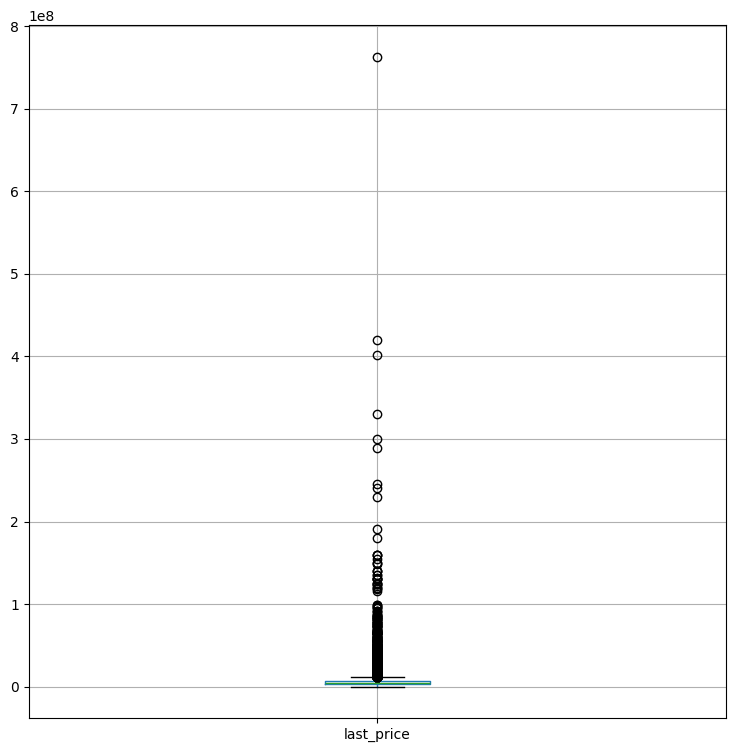

In [120]:
data.boxplot(column='last_price', figsize=(9, 9))
plt.show()

Мы наблюдаем аномально высокий выброс, из-за чего гистограмма выше имеет огромный околонулевой выброс. С аномальными значениями разберемся позже.
Пока что разберемся с гистограммой, не учитывая аномально высокий выброс, для этого увеличим масштаб

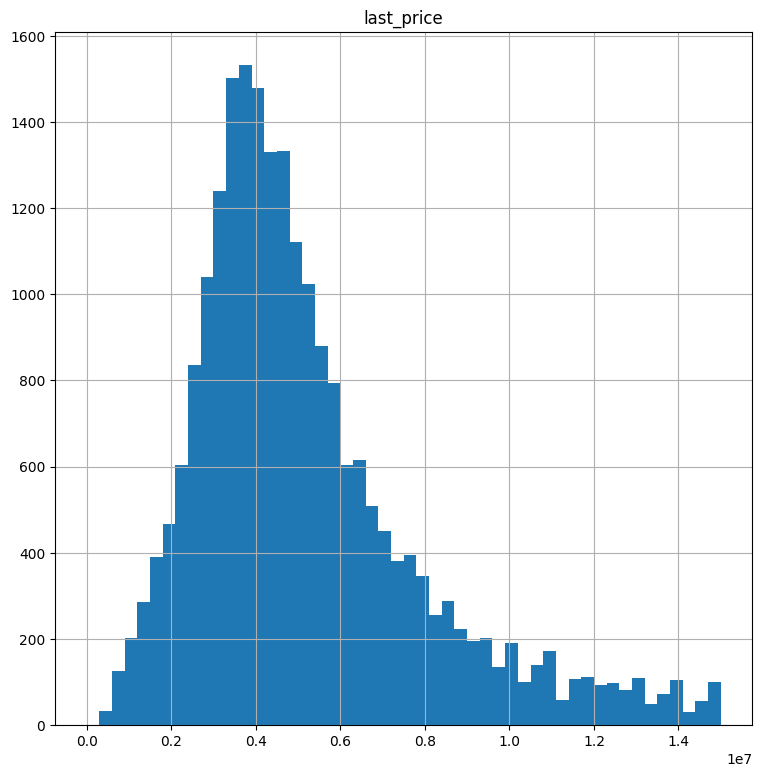

In [121]:
data.hist(column='last_price', bins=50, range=(0, 15000000), figsize=(9, 9))
plt.show()

Если мы не учитываем тот аномальный выброс, то распределение выглядит правдиво

### Вывод:
На данном этапе большинство данных выглядит правдоподобно. 
<br>
Мы наблюдаем выбросы около нуля в следующих столбцах:
- `celling_height`
- `days_exposition`
- `floor`
- `floors_total`
- `kitchen_area`
- `last_price` — без учета аномального выброса, данный столбец подчиняется распределению Пуассона
- `living_area`
- `total_area`
- `parks_around3000`
- `ponds_around3000`

## Предобработка данных

На данном шаге мы обработаем пропуски, найдем и удалим дубликаты, приведем все данные к корректному типу, найдем и обработаем аномалии(выбросы) 

### Обработка пропусков

В первую очередь мы должны посмотреть, сколько пропусков у нас в каждом столбце

In [122]:
data.isna().sum()

airports_nearest         5542
balconies               11519
ceiling_height           9195
city_centers_nearest     5519
days_exposition          3181
first_day_exposition        0
floor                       0
floors_total               86
is_apartment            20924
kitchen_area             2278
last_price                  0
living_area              1903
locality_name              49
is_open_plan                0
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
rooms                       0
is_studio                   0
total_area                  0
total_images                0
dtype: int64

У нас присутствую пропуски в следующих столбцах:

1. `airports_nearest`
<br>
Возможные причины:
- Технический сбой
- Нет аэропортов поблизости
<br>
<br>
Так как эта метрика была добавлена автоматически, то мы исключаем вариант, при котором владелец не указал данные вручную. Скорее всего нам придется заполнить данные медианным значением, основываясь на столбце `locality_name` 

2. `balconies`
<br>
Возможные причины:
- Владелец не указал количество балконов
- В лоте отсутствуют балконы
- В лоте вместо балкона присутствует лоджия
- В лоте присутствует терраса, что не является балконом
<br>
<br>
Во всех случаях мы можем заменить пропуски на `0`, так как эта метрика для нас не является важной

3. `ceiling_height`
<br>
Возможные причины:
- Владелец не посчитал данную метрику важной
- Высота потолка стандартная для типовых домов (сталинка, хрущевка, и.т.д.)
<br>
<br>
Проанализируем, в каких населённых пунктах выставлены лоты, у которых есть пропуск в данном столбце. В зависимости от того, сколько данных у нас будет, можно будет заменить данные медианным значением

4. `city_centers_nearest`
<br>
Возможные причины:
- Технический сбой
- Лот находится вне города. К примеру дача, частный участок, и.т.д.
<br>
<br>
Так как эта метрика была добавлена автоматически, то мы исключаем вариант, при котором владелец не указал данные вручную, следовательно, расстояние до центра города отсутствуют. В первую очередь надо проверить, где находится лот
<br>
В случае, если подтвердится первая гипотеза, то мы сможем заполнить значения медианным значением, основываясь на столбце `locality_name`
<br>
В случае, если подтвердится вторая гипотеза, то придется оставить пропуски

5. `days_exposition`
<br>
Возможные причины:
- Технический сбой
- Объявление еще не снято
<br>
<br>
В данном случае мы не можем заполнить пропуски

6. `floors_total`
<br>
Возможные причины:
- Продажа участка без дома
- Продажа коммерческой недвижимости
- Владелец не посчитал эту метрику важной
<br>
<br>
Скорее всего нам придется заменить пропуски медианным значением по населённому пункту

7. `is_apartment` 
<br>
Возможные причины:
- Владелец не посчитал данную метрику важной
<br>
<br>
Рождается гипотеза, что лот принадлежит к другому типу недвижимости (квартира, участок, коммерческая недвижимость, и.т.д.)
<br>
Скорее всего придется заполнить пропуски значением `False`, однако перед заполнением надо дополнительно проверить, наличие комнат, жилую площадь, этажность

8. `kitchen_area` 
<br>
Возможные причины:
- Лот принадлежит к типу недвижимости, которая не имеет кухни (студия, участок, коммерческая недвижимость, и.т.д.) 
- Кухня объединена с гостиной
- В лоте отсутствует отделка, то есть `is_open_plan = True`
- Владелец не посчитал данную метрику важной
<br>
<br>
Для нас это не самая важная метрика, так как она не влияет на цену и общую площадь, потому скорее всего пропуски в данной метрике нам придется оставить

9. `living_area`
<br>
Возможные причины:
- Владелец не заполнил данную метрику
- Лот принадлежит к типу недвижимости, в которой нет жилой площади (участок, коммерческая недвижимость, и.т.д.)
<br>
<br>
Эта метрика является для нас важной. Если вторая гипотеза верна, то мы сможем заполнить значения, ссылаясь на столбец `total_area`, в котором нет пропусков

10. `locality_name`
<br>
Возможные причины:
- Технический сбой
- Мошеннические операции
- Лот находится в месте, которое не принадлежит ни к какому населенному пункту
<br>
<br>
Эта метрика является для нас крайне важной, так что скорее всего строки с пропусками придется удалить, чтобы повысить качество данных. Благо, таких строк всего 49, значит пропуски составляет всего `0,2%` от общего числа данных

11. `parks_around3000`, `ponds_around3000`
<br>
Возможные причины:
- Технический сбой
- Рядом с лотом отсутствуют парки и пруды.
<br>
<br>
Так как эта метрика была добавлена автоматически, то мы исключаем вариант, при котором владелец не указал данные вручную, следовательно, парки и пруды в радиусе 3-х км отсутсвуют. В первую очередь надо проверить, где находится лот
<br>
В случае, если подтвердится первая гипотеза, то мы сможем заполнить значения медианным значением, основываясь на столбце `locality_name`
<br>
В случае, если подтвердится вторая гипотеза, то мы сможем заменить значение на `0`


12. `parks_nearest`, `ponds_nearest`
<br>
Возможные причины:
- Технический сбой
- Ближайшие парки и пруды находятся за пределом "счета" алгоритма по поиску
<br>
<br>
Так как эта метрика была добавлена автоматически, то мы исключаем вариант, при котором владелец не указал данные вручную, следовательно, расстояние до центра города отсутствуют. В первую очередь надо проверить, где находится лот
<br>
В случае, если подтвердится первая гипотеза, то мы сможем заполнить значения медианным значением, основываясь на столбце `locality_name`
<br>
В случае, если подтвердится вторая гипотеза, то придется оставить пропуски

#### 1. Обработка пропусков в `locality_name`

In [123]:
data[data['locality_name'].isna()].head(10)

,airports_nearest,balconies,ceiling_height,city_centers_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,is_open_plan,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,rooms,is_studio,total_area,total_images
1097,23478.0,0.0,3.55,4258.0,147.0,2016-04-15T00:00:00,2,5.0,NaN,8.80,8600000.0,50.80,NaN,False,0.0,NaN,0.0,NaN,3,False,81.7,3
2033,NaN,0.0,NaN,NaN,34.0,2017-05-30T00:00:00,2,4.0,NaN,18.60,5398000.0,42.60,NaN,False,NaN,NaN,NaN,NaN,3,False,80.0,6
2603,22041.0,0.0,NaN,17369.0,276.0,2015-09-20T00:00:00,3,24.0,NaN,10.70,3351765.0,15.60,NaN,False,0.0,NaN,1.0,374.0,1,False,42.7,20
2632,22041.0,0.0,NaN,17369.0,256.0,2015-10-11T00:00:00,21,24.0,NaN,8.20,5130593.0,33.10,NaN,False,0.0,NaN,1.0,374.0,2,False,62.4,2
3574,27419.0,0.0,NaN,8127.0,45.0,2016-05-28T00:00:00,5,5.0,NaN,6.50,4200000.0,30.80,NaN,False,0.0,NaN,1.0,603.0,2,False,46.5,10
4151,25054.0,0.0,3.00,3902.0,869.0,2014-12-09T00:00:00,7,8.0,NaN,13.38,17600000.0,39.62,NaN,False,1.0,485.0,3.0,722.0,2,False,89.5,17
4189,21774.0,0.0,4.00,3039.0,223.0,2015-12-10T00:00:00,3,4.0,False,10.40,9200000.0,52.30,NaN,False,1.0,690.0,1.0,953.0,3,False,80.0,7
4670,26534.0,0.0,NaN,5382.0,350.0,2015-08-14T00:00:00,6,7.0,NaN,NaN,5500000.0,NaN,NaN,False,1.0,446.0,1.0,376.0,3,False,83.0,1
5343,10556.0,4.0,NaN,9538.0,303.0,2016-01-20T00:00:00,5,7.0,False,8.30,13540000.0,59.10,NaN,False,1.0,67.0,0.0,NaN,3,False,85.5,19
5707,21460.0,0.0,NaN,16788.0,49.0,2016-04-29T00:00:00,23,24.0,NaN,NaN,3700000.0,20.00,NaN,False,0.0,NaN,1.0,170.0,1,False,30.0,7


К сожалению, мы не можем восстановить данные в `locality_name`, потому нам придется удалить все строки, улучшив качество данных

In [124]:
print('Количество строк до удаления пропусков', data.shape[0])

data.dropna(subset=['locality_name'], inplace=True)

print('Количество строк после удаления пропусков', data.shape[0])

Количество строк до удаления пропусков 23699
Количество строк после удаления пропусков 23650


Пропуски удалены корректно, разница между количеством строк до и после удаления равна количеству пропусков в `locality_name`

#### 2. Обработка пропусков в `balconies`

Как мы уже решили выше, все пропуски можно заменить на `0`

In [125]:
data['balconies'] = data['balconies'].fillna(0)
data['balconies'].isna().sum()  # Проверяем, остались ли пропуски в данном столбце

np.int64(0)

Пропуски были удалены корректно

#### 3. Обработка пропусков в `is_apartment`

In [126]:
data['is_apartment'].unique()  # Проверяем, какие значения есть в данном столбце

array([nan, False, True], dtype=object)

Мы имеем 3 значения: `NaN`, `False`, `True`
<br>
Рождается гипотеза, что `NaN` появился из-за того, что владелец не обозначил лот как апартаменты, потому что он принадлежит к другому типу (квартира, коммерческая недвижимость, участок, и.т.д.)
<br>
Посмотрим, насколько данное предположение правдиво. Для этого проанализируем, наличие комнат в лоте, общую площадь, этажность

In [127]:
# Создаем срез данных, с пропуском в столбце is_apartment и выводим столбцы 'is_apartment', 'rooms', 'total_area'
(data.query('is_apartment.isna() == True')
 .loc[:, ['is_apartment', 'rooms', 'living_area', 'floor']]
 .head(10)
 )

,is_apartment,rooms,living_area,floor
0,NaN,3,51.00,8
1,NaN,1,18.60,1
2,NaN,2,34.30,4
3,NaN,3,NaN,9
4,NaN,2,32.00,13
5,NaN,1,14.40,5
6,NaN,1,10.60,6
7,NaN,2,NaN,22
8,NaN,1,15.43,26
9,NaN,3,43.60,7


Наша гипотеза подтвердилась, в данных лотах есть комнаты, указан размер жилой площади, этаж, следовательно, это жилой объект. Значит владелец просто не указал, что данный лот не относится к апартаментам
<br>
Заполним пропуски значением `False`

In [128]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()  # Проверяем, остались ли пропуски в данном столбце

np.int64(0)

#### 4. Обработка пропусков в `kitchen_area`

In [129]:
# Создаем срез данных, с пропуском в столбце kitchen_area и выводим столбцы 'kitchen_area', 'rooms', 'total_area'
(data.query('kitchen_area.isna() == True')
 .loc[:, ['kitchen_area', 'rooms', 'total_area', 'floor', 'is_open_plan']]
 .head(10)
 )

,kitchen_area,rooms,total_area,floor,is_open_plan
3,NaN,3,159.0,9,False
30,NaN,1,32.8,2,False
37,NaN,2,45.8,1,False
44,NaN,1,40.0,3,False
59,NaN,1,46.5,13,False
60,NaN,1,35.0,8,False
81,NaN,1,68.0,6,False
82,NaN,3,80.5,16,False
133,NaN,1,31.0,6,False
144,NaN,0,27.0,2,False


В столбце `rooms` мы видим, что превалирует значение `1`. Так же площадь в `total area` соответствует метражу студии
<br>
В столбце `rooms` мы так же видим значение `3` и "большую" площадь в `total area`.
<br>
Наша гипотеза о том, что кухня либо отсутствует, либо совмещена с другой комнатой, подтвердилась, так что мы можем заменить пропуски в данном столбце на `0`'. Однако мы так же можем посчитать соотношение площади кухни к общей площади, основываясь на имеющихся данных. Посмотрим, какое соотношение площадей. Перед этим посмотрим на гистограмму данного столбца

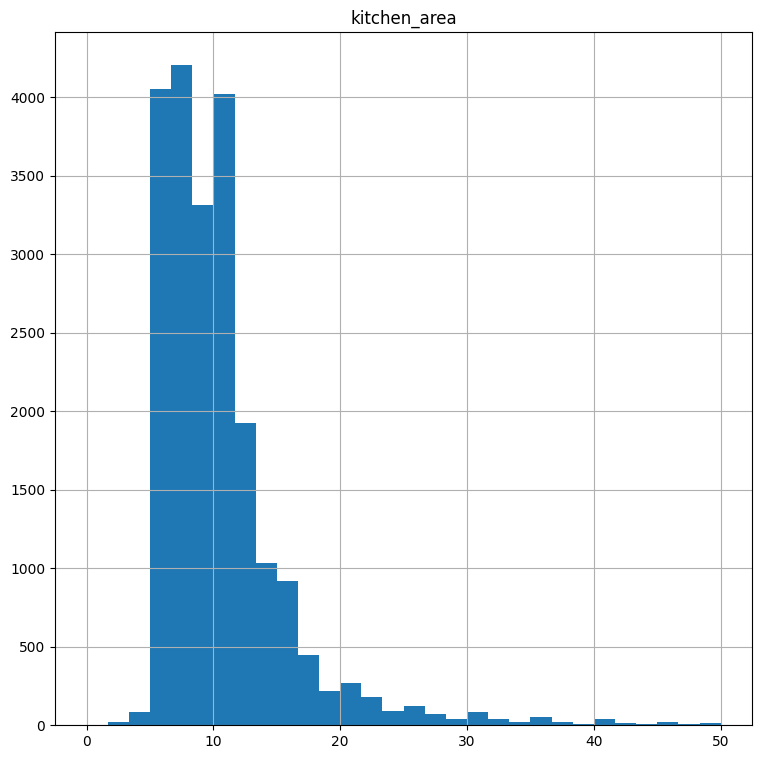

In [130]:
data.hist('kitchen_area', bins=30, range=(0, 50), figsize=(9,9))
plt.show()

In [131]:
data['kitchen_area'].median() / data['total_area'].median()

np.float64(0.175)

In [132]:
data['kitchen_area'] = data['kitchen_area'].fillna(
    data['total_area'] * (data['kitchen_area'].median() / data['total_area'].median()))
data['kitchen_area'].isna().sum()

np.int64(0)

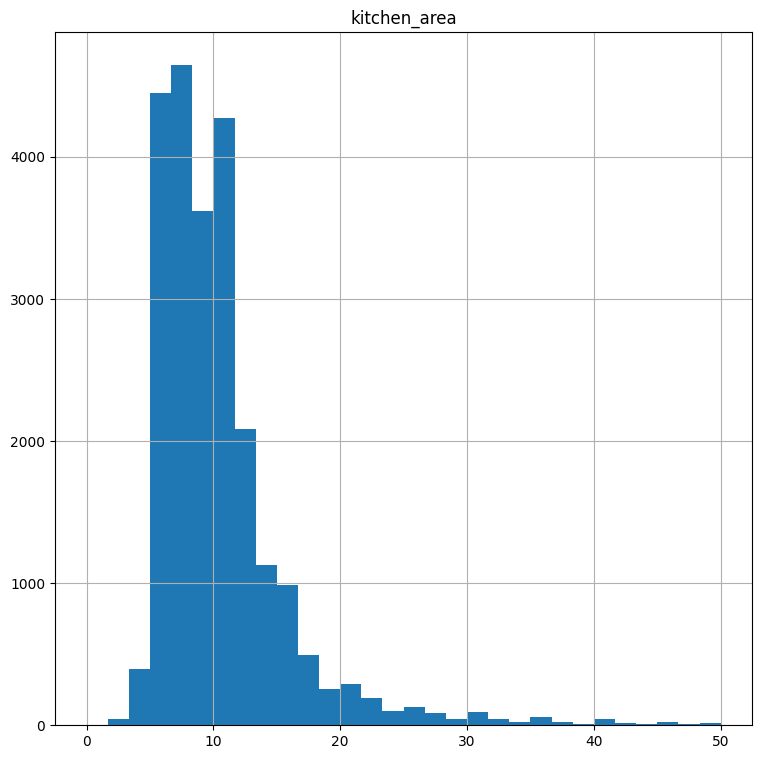

In [133]:
data.hist('kitchen_area', bins=30, range=(0, 50), figsize=(9,9))
plt.show()

Выбросов около нуля не появилось, столбце с медианным значением вырос, значит мы все сделали верно

#### 5. Обработка пропусков в `living_area`

In [134]:
# Создаем срез данных, с пропуском в столбце living_area и выводим столбцы 'living_area', 'rooms', 'total_area'
(data.query('living_area.isna() == True')
 .loc[:, ['living_area', 'rooms', 'total_area', 'floor']]
 .head(10)
 )

,living_area,rooms,total_area,floor
3,NaN,3,159.0,9
7,NaN,2,71.6,22
30,NaN,1,32.8,2
37,NaN,2,45.8,1
44,NaN,1,40.0,3
59,NaN,1,46.5,13
60,NaN,1,35.0,8
81,NaN,1,68.0,6
82,NaN,3,80.5,16
116,NaN,3,97.2,16


In [135]:
# Проверим, нет ли среди лотов продажи земельных участков
(data.query('(living_area.isna() == True) and (rooms.isna() == True)')
 .loc[:, ['living_area', 'rooms', 'total_area', 'floor']]
 .head(10)
 )

,living_area,rooms,total_area,floor


Мы видим, что лоты не имеют пропуска в столбцах `rooms`, `total_area`, `floor`, следовательно лот является жилым объектом. Наша гипотеза о том, что владелец не заполнил данные подтвердилась. Заменим здесь пропуски аналогично тому, как мы заменили пропуски в `kitchen_area`. Перед этим посмотрим на гистограмму

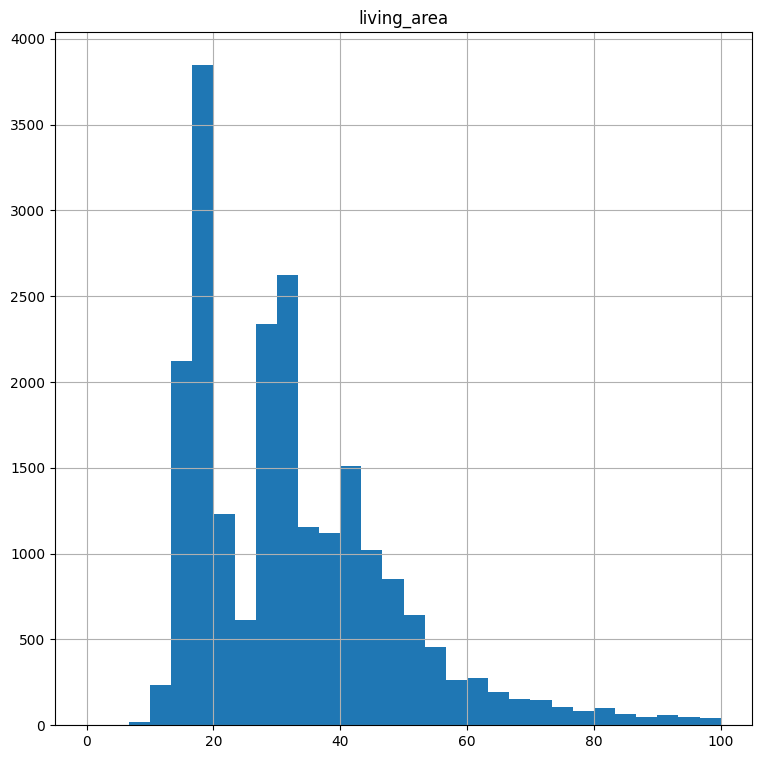

In [136]:
data.hist('living_area', bins=30, range=(0, 100), figsize=(9,9))
plt.show()

In [137]:
data['living_area'].median() / data['total_area'].median()

np.float64(0.5769230769230769)

In [138]:
data['living_area'] = data['living_area'].fillna(
    data['total_area'] * (data['living_area'].median() / data['total_area'].median()))
data['living_area'].isna().sum()

np.int64(0)

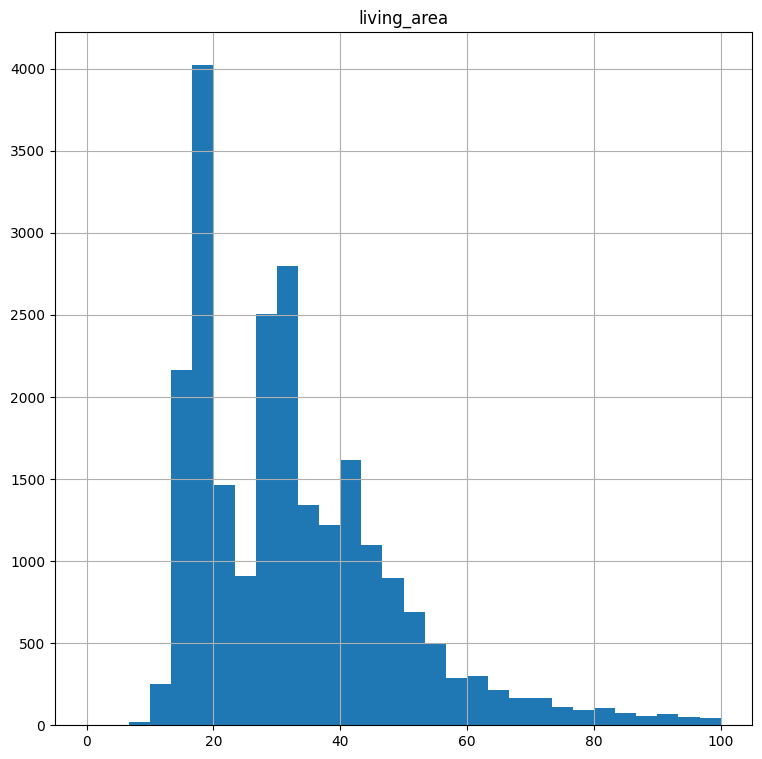

In [139]:
data.hist('living_area', bins=30, range=(0, 100), figsize=(9,9))
plt.show()

Выбросов около нуля не появилось, столбце с медианным значением вырос, значит мы все сделали верно

#### 6. Обработка пропусков в `floors_total`

In [140]:
(data.query('floors_total.isna() == True')
 .loc[:, ['floors_total', 'floor', 'total_area', 'locality_name']]
 .head(20)
 )

,floors_total,floor,total_area,locality_name
186,NaN,4,65.20,Санкт-Петербург
237,NaN,1,28.10,Санкт-Петербург
457,NaN,12,70.80,Санкт-Петербург
671,NaN,8,93.60,Санкт-Петербург
1757,NaN,9,39.00,Санкт-Петербург
1930,NaN,4,66.77,Санкт-Петербург
2392,NaN,22,53.00,Санкт-Петербург
2846,NaN,15,27.80,Санкт-Петербург
2952,NaN,6,54.30,Санкт-Петербург
3031,NaN,12,56.70,Кудрово


У нас возникла дилемма, мы можем заполнить пропуски медианным значением по `locality_name`, но велик шанс, что тогда общее количество этажей окажется меньше, чем этаж лота
<br>
Мы можем заполнить пропуски медианным значением из столбца `floor`, но тогда данные тоже могут оказаться далеко от правды. Сгруппируем данные по населённому пункту и посмотрим, какое медианное значение фигурирует в каждом населённом пункте

In [141]:
data.pivot_table(index='locality_name', values='floor', aggfunc='median').head(10)

,floor
locality_name,
Бокситогорск,2.5
Волосово,2.0
Волхов,3.0
Всеволожск,4.0
Выборг,3.0
Высоцк,1.5
Гатчина,3.0
Зеленогорск,2.0
Ивангород,3.5


Действительно, заменять пропуски медианным значением по населённому пункту — плохая идея. Среди значений фигурируют нецелые значения
<br>
Данная метрика не является для нас особо важной, потому самым грамотным решением будет продублировать значения из столбца `floor`

In [142]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])
data['floors_total'].isna().sum()  # Проверяем, остались ли пропуски в данном столбце

np.int64(0)

#### 7. Обработка пропусков в `ceiling_height`

Самым верным решением будет заменить высоту потолков на медианное значение в населенном пункте. Однако перед этим надо посмотреть, нет ли у нас выбросов, которые сильно искажают данные. Применим метод `.boxplot` к столбцу `ceiling_height`

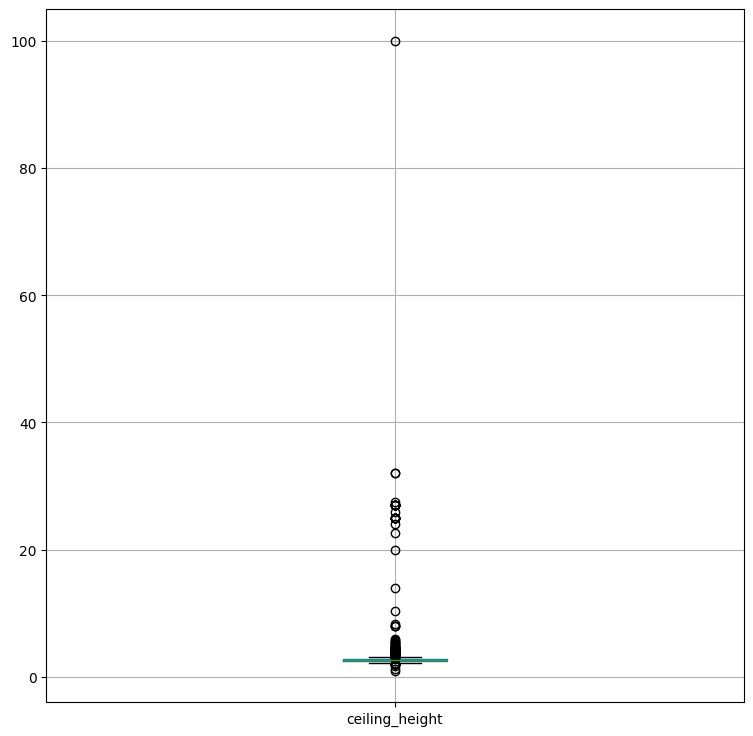

In [143]:
data.boxplot(column='ceiling_height', figsize=(9, 9))
plt.show()

Мы видим, что у нас есть большое количество выбросов, которые могут сильно исказить медианное значение, особенно для населенных пунктов с малым количеством лотов. Проанализируем выбросы позже, сейчас нам надо разобраться с медианным значением, потому приблизим масштаб, чтобы увидеть, в каких пределах лежит ящик с усами

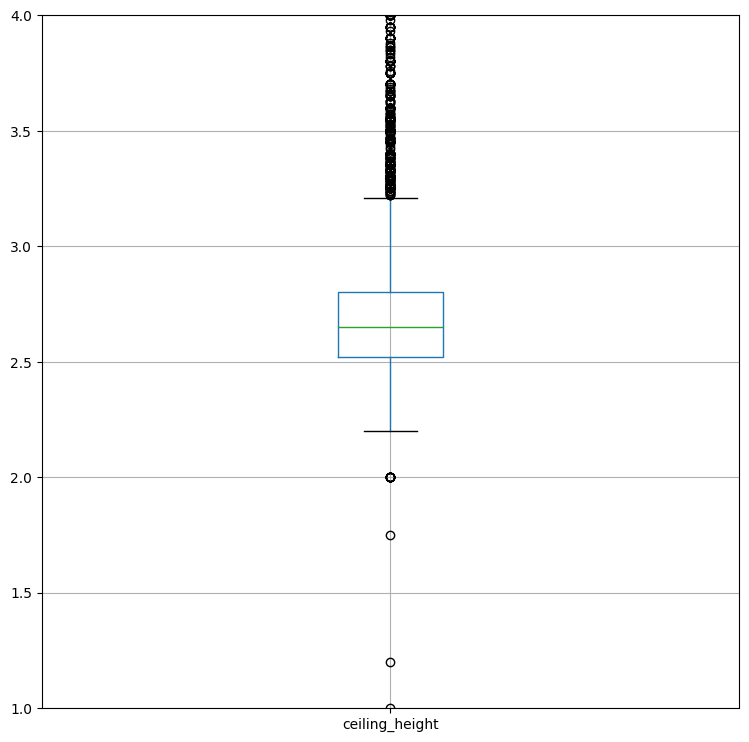

In [144]:
data.boxplot(column='ceiling_height', figsize=(9, 9))
plt.ylim(1, 4)
plt.show()

Мы видим, что медианные значения лежат в пределах от `2.2`м до `3.2`м. Посмотрим на медианные значения, сгруппировав данные по населенному пункту. 

In [145]:
data.groupby('locality_name')['ceiling_height'].median().sort_values(ascending=False).head(10)

locality_name
деревня Нижняя                27.00
деревня Мины                  27.00
поселок Новый Свет            13.85
Бокситогорск                   3.90
посёлок Ропша                  3.20
деревня Ваганово               3.15
деревня Глинка                 3.10
деревня Каськово               3.00
посёлок Лисий Нос              3.00
коттеджный поселок Счастье     3.00
Name: ceiling_height, dtype: float64

In [146]:
# Смотрим медианное значение среди медианных значений
(data.groupby('locality_name')['ceiling_height'].median()).median()

np.float64(2.55)

Мы видим 3 выбивающихся значений:
- `27` — В двух населенных пунктах `деревня Мины` и `деревня Нижняя`. Ошибка похожа на опечатку
- `13.85` — В населенном пункте `поселок Новый Свет`. На опечатку это не похоже, Вероятно, на медианное значение влияет выброс
- `3.9` — В населенном пункте `Бокситогорск`. Возможно, это элитная недвижимость, а возможно на значение влияет выброс
 
Рассмотрим данные населенные пункты детальнее

In [147]:
# Сперва рассмотрим населенные пункты, в которых медианное значение равно 27
data.loc[
    ((data['locality_name'] == 'деревня Мины') | (data['locality_name'] == 'деревня Нижняя')),
    ('locality_name', 'ceiling_height')
]

,locality_name,ceiling_height
2158,деревня Мины,NaN
5246,деревня Мины,27.0
22938,деревня Нижняя,27.0


Таких лотов всего 3, так что если приведем так что если в данных населенных пунктах мы приведем высоту потолков к `2.7`, то качество данных не изменится, даже если наша гипотеза не верна.

In [148]:
data.loc[(data['locality_name'] == 'деревня Мины') |
         (data['locality_name'] == 'деревня Нижняя'),
'ceiling_height'] = 2.7
# Я не знаю, как сделать код лаконичнее. использовать метод where() как будто бы неоправданно для замены
# в 3-х лотах

data.loc[
    ((data['locality_name'] == 'деревня Мины') | (data['locality_name'] == 'деревня Нижняя')),
    ('locality_name', 'ceiling_height')
]

,locality_name,ceiling_height
2158,деревня Мины,2.7
5246,деревня Мины,2.7
22938,деревня Нижняя,2.7


Теперь разберемся с населенным пунктом `поселок Новый Свет`

In [149]:
data.loc[data['locality_name'] == 'поселок Новый Свет', ('locality_name', 'ceiling_height')]

,locality_name,ceiling_height
313,поселок Новый Свет,NaN
839,поселок Новый Свет,2.7
10067,поселок Новый Свет,NaN
10069,поселок Новый Свет,NaN
14382,поселок Новый Свет,25.0


Видим, что в данном населенном пункте у нас всего 2 лота, у которых указана высота потолка. `2.7` и `25`. Второе значение похоже на опечатку, исправим его, и заменим пропуски на медианное значение по населенному пункту 

In [150]:
# Меняем значение с 25 на 2.5
data.loc[(data['locality_name'] == 'поселок Новый Свет') &
         (data['ceiling_height'] == 25),
'ceiling_height'] = 2.5

# Заменяем пропуски в поселке Новый свет медианным значением
data.loc[data['locality_name'] == 'поселок Новый Свет', 'ceiling_height'] \
    = data.loc[data['locality_name'] == 'поселок Новый Свет', 'ceiling_height'].fillna(
    data.loc[data['locality_name'] == 'поселок Новый Свет', 'ceiling_height'].median()
)

data.loc[data['locality_name'] == 'поселок Новый Свет', ('locality_name', 'ceiling_height')]

,locality_name,ceiling_height
313,поселок Новый Свет,2.6
839,поселок Новый Свет,2.7
10067,поселок Новый Свет,2.6
10069,поселок Новый Свет,2.6
14382,поселок Новый Свет,2.5


Осталось только разобраться со значением `3.9` в населенном пункте `Бокситогорск`. Посмотрим, какие лоты находятся в данном населенном пункте

In [151]:
data.loc[data['locality_name'] == 'Бокситогорск', ('locality_name', 'ceiling_height')]

,locality_name,ceiling_height
638,Бокситогорск,NaN
764,Бокситогорск,NaN
1053,Бокситогорск,5.0
1761,Бокситогорск,NaN
3010,Бокситогорск,NaN
3731,Бокситогорск,NaN
5821,Бокситогорск,NaN
8630,Бокситогорск,NaN
8767,Бокситогорск,NaN
8779,Бокситогорск,NaN


В данном населенном пункту у нас всего 2 значения. `5` `2.8`. В данном случае заполнять пропуски медианным значением будет неправильно, так что заполним в этом поселке значением `2.8`, которое приближено к медианному значению среди медианных.

In [152]:
data.loc[data['locality_name'] == 'Бокситогорск', 'ceiling_height'] = \
    data.loc[data['locality_name'] == 'Бокситогорск', 'ceiling_height'].fillna(2.8)

data.loc[data['locality_name'] == 'Бокситогорск', ['locality_name', 'ceiling_height']]

,locality_name,ceiling_height
638,Бокситогорск,2.8
764,Бокситогорск,2.8
1053,Бокситогорск,5.0
1761,Бокситогорск,2.8
3010,Бокситогорск,2.8
3731,Бокситогорск,2.8
5821,Бокситогорск,2.8
8630,Бокситогорск,2.8
8767,Бокситогорск,2.8
8779,Бокситогорск,2.8


Теперь заново посмотрим медианные значения, сгруппировав данные по столбцу `locality_name`

In [153]:
data.groupby('locality_name')['ceiling_height'].median().sort_values(ascending=False).head(10)

locality_name
посёлок Ропша                  3.200
деревня Ваганово               3.150
деревня Глинка                 3.100
посёлок Лисий Нос              3.000
коттеджный поселок Счастье     3.000
деревня Каськово               3.000
деревня Бор                    2.950
Бокситогорск                   2.800
городской посёлок Новоселье    2.800
посёлок Репино                 2.775
Name: ceiling_height, dtype: float64

Мы обработали выбивающиеся значения, и теперь можем заменить пропуски на медианные значения

In [154]:
# Смотрим, сколько пропусков у нас на данный момент
data['ceiling_height'].isna().sum()

np.int64(9142)

In [155]:
for locality, locality_data in data.groupby('locality_name'):
    data.loc[data['locality_name'] == locality, 'ceiling_height'] = \
        data.loc[data['locality_name'] == locality, 'ceiling_height'].fillna(
            locality_data['ceiling_height'].median()
        )

data['ceiling_height'].isna().sum()  # Проверяем, остались ли у нас пропуски в данном столбце

np.int64(121)

In [156]:
# Посмотрим, в скольких населенных пунктах отсутствуют данные
data.groupby('locality_name')['ceiling_height'].median().isna().sum()

np.int64(81)

У нас остался 121 пропуск. Они не заполнились, потому что в 81 населенном пункте не было вообще никаких значений, следовательно, и медианному было неоткуда взяться. Заполним эти пропуски медианным значением медианных значений.

In [157]:
data['ceiling_height'] = data['ceiling_height'].fillna(
    (data.groupby('locality_name')['ceiling_height'].median()).median()
)

data['ceiling_height'].isna().sum()  # Проверяем, остались ли пропуски

np.int64(0)

#### 8. Обработка пропусков в `days_exposition`

Перед обработкой пропусков нам надо привести столбец `first_day_exposition` к типу данных `datetime64`

In [158]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].dtype # Проверяем, привелся ли столбец к правильному типу данных

dtype('<M8[ns]')

Посмотрим, какая была дата на момент получения данных, после чего воспользуемся `pd.Timedelta()`, указав параметр `days=`

In [159]:
data.loc[:, ('first_day_exposition', 'days_exposition')].head()

,first_day_exposition,days_exposition
0,2019-03-07,NaN
1,2018-12-04,81.0
2,2015-08-20,558.0
3,2015-07-24,424.0
4,2018-06-19,121.0


In [160]:
print(data.loc[1, 'first_day_exposition'] + pd.Timedelta(days=data.loc[1, 'days_exposition']))
print(data.loc[4, 'first_day_exposition'] + pd.Timedelta(days=data.loc[4, 'days_exposition']))

2019-02-23 00:00:00
2018-10-18 00:00:00


Действительно, даты различаются, так что мы не можем заполнить пропуски, так как это означает, что публикация еще не снята. Заполнять пропуски нулем — плохая идея, потому что это исказит данные и мы не сможем корректно выполнить исследовательский анализ данных. Заполним пропуски значением `-1`, чтобы позже мы смогли привести тип данных к `int64`. Во время исследовательского анализа данных, отсеям данные, по `-1`

In [161]:
data['days_exposition'] = data['days_exposition'].fillna(-1)
data['days_exposition'].isna().sum()  # Проверяем, остались ли пропуски в данном столбце

np.int64(0)

#### 9. Обработка пропусков в `parks_around3000` и `ponds_around3000`

Так как эти данные добавлены автоматически, то рождается гипотеза, что данные пропуски появились из-за того, что в населенном пункте в радиусе 3км нет прудов и парков.

In [162]:
print('Парки: ', data['parks_around3000'].isna().sum())
print('Пруды: ', data['ponds_around3000'].isna().sum())

Парки:  5510
Пруды:  5510


In [163]:
data.pivot_table(index='locality_name', values=['parks_around3000', 'ponds_around3000'], aggfunc=['count']).head(10)

count                 
              parks_around3000 ponds_around3000
locality_name                                  
Бокситогорск                 0                0
Волосово                     0                0
Волхов                       0                0
Всеволожск                   0                0
Выборг                       0                0
Высоцк                       0                0
Гатчина                      0                0
Зеленогорск                 24               24
Ивангород                    0                0
Каменногорск                 0                0

Наша гипотеза подтвердилась, можем заменить пропуски на `0`

In [164]:
data[['parks_around3000', 'ponds_around3000']] = data[['parks_around3000', 'ponds_around3000']].fillna(0)

# Проверям, остались ли пропуски в данных столбцах
print('Парки: ', data['parks_around3000'].isna().sum())
print('Пруды: ', data['ponds_around3000'].isna().sum())

Парки:  0
Пруды:  0


#### 10. Обработка пропусков в `parks_nearest` и `ponds_nearest`

Мы добрались до самого сложного заполнения пропусков с точки зрения анализа. Эти данные заполнены автоматически на основе геоданных, так что природа пропусков может быть вызвана 2-мя причинами:
- Технический сбой
- Алгоритм перестает записывать данные после какого-то расстояния

В обоих случаях мы не можем заполнить пропуски, однако мы можем найти верхнюю границу, после которой алгоритм перестает "записывать расстояние.

In [165]:
# Проверяем количество пропусков в данных столбцах
print('Парки:', data['parks_nearest'].isna().sum())
print('Пруды:', data['ponds_nearest'].isna().sum())

Парки: 15586
Пруды: 14565


In [166]:
# Проверим верхнюю границу, после которой алгоритм перестает записывать данные
print('Парки:', data['parks_nearest'].max(), 'метров')
print('Пруды:', data['ponds_nearest'].max(), 'метров')

Парки: 3190.0 метров
Пруды: 1344.0 метров


#### 11. Обработка пропусков в `airports_nearest`

Здесь все аналогично столбцам `parks_nearest` и `ponds_nearest`

In [167]:
# Проверяем количество пропусков в данных столбцах
print(data['airports_nearest'].isna().sum())

5534


In [168]:
# Проверим верхнюю границу, после которой алгоритм перестает записывать данные
print(data['airports_nearest'].max(), 'метров')

84869.0 метров


Алгоритм перестает записывать данные после `85км`. Все остальные населенные пункты дальше удалены от аэропортов

#### 12. Обработка пропусков в `city_centers_nearest`

Здесь все аналогично столбцам `parks_nearest`, `ponds_nearest`, `airports_nearest`

In [169]:
# Проверяем количество пропусков в данных столбцах
print(data['city_centers_nearest'].isna().sum())

5511


Число пропусков близко к количеству пропусков в `airports_nearest`. Наша гипотеза о том, что данные лоты выставлены в дальноудаленных, маленьких населенных пунктах, все больше подтверждается

In [170]:
# Проверим верхнюю границу, после которой алгоритм перестает записывать данные
print(data['city_centers_nearest'].max(), 'метров')

65968.0 метров


#### Вывод:

Пропуски были найдены в следующих столбцах:

1. `balconies`
<br>
Пропуски в данном столбце были заменены на <code>0</code>
<br>
2. `ceiling_height`
<br>
Пропуски в данном столбце были заменены на медианные значение высоты потолков, основываясь на населенном пункте.
В 3-х населенных пунктах выбросы повлияли на медианное значение, потому мы "вручную" исправили выбросы, и заполнили пропуски медианными значениями 
<br>
<br>
3. `days_exposition`
<br>
В данном столбце мы не смогли удалить пропуски, потому что объявления, на момент даты получения данных, еще не были сняты с публикации
<br>
<br>
4. `floors_total`
<br>
Пропуски в данном столбце мы заменили на значения из столбца <code>floor</code>, потому что медианные значения были далеки от правды
<br>
<br>
5. `is_apartment`
<br>
Пропуски в данном столбце мы заменили на <code>0</code>, который в процессе обработки типов данных заменится на `False`. Перед заполнением, мы дополнительно проверили, не является ли лот земельным участком
<br>
<br>
6. `kitchen_area`
<br>
Для заполнения пропусков в данном столбце мы посчитали соотношение медианных значений общей площади и площади кухни, после чего в столбцах с пропусками домножили общую площадь на посчитанное соотношение
<br> 
<br> 
7. `living_area`
<br>
Для заполнения пропусков в данном столбце мы посчитали соотношение медианных значений общей площади и жилой площади, после чего в столбцах с пропусками домножили общую площадь на посчитанное соотношение
<br>
<br>
8. `locality_name`
<br>
Мы полностью удалили строки с пропусками в этом столбце из датасета, потому что данная метрика является крайне важной. Всего было удалено <code>49</code> строк
<br>
<br>
9. `city_centers_nearest`
<br>
В данном столбце пропуски были вызваны техническим сбоем и тем, что алгоритм после <code>65 км</code> не записывает значения. Заполнить их мы не можем


10. `airports_nearest`
<br>
В данном столбце пропуски были вызваны техническим сбоем и тем, что алгоритм после <code>85 км</code> не записывает значения. Значения в данном столбце мы не можем заполнить, чтобы не исказить данные для исследовательского анализа
11. `parks_nearest`, `ponds_nearest`
<br>
В данном столбце пропуски были вызваны техническим сбоем и тем, что алгоритм после <code>3 км</code> и <code>1.5 км</code> не записывает значения.
12. `parks_around3000`, `ponds_around3000`
<br> 
В данных столбцах мы заменили пропуски на <code>0</code>, потому что либо лот находится в населенном пункте, в котором отсутсвуют парки и пруды, либо потому что рядом с лотом в радиусе 3-х км нет парков и прудов. Заменить пропуски медианным значением мы не можем, так как эта метрика показывает парки не в населенном пункте, а именно в 3-х километрах от лота

In [171]:
data.isna().sum()

airports_nearest         5534
balconies                   0
ceiling_height              0
city_centers_nearest     5511
days_exposition             0
first_day_exposition        0
floor                       0
floors_total                0
is_apartment                0
kitchen_area                0
last_price                  0
living_area                 0
locality_name               0
is_open_plan                0
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
rooms                       0
is_studio                   0
total_area                  0
total_images                0
dtype: int64

### Поиск дубликатов

In [172]:
len(data.index)  # Проверяем количество строк в датасете перед удалением явных дубликатов

23650

In [173]:
data.drop_duplicates()
len(data.index)  # Проверяем количество строк в датасете после удалением явных дубликатов

23650

У нас нет явных дубликатов, можем спокойно переходить к поиску и удалению неявных дубликатов. Дубликаты могут возникнуть в столбце `locality_name`. Сначала посмотрим, сколько у нас уникальных населенных пунктов

In [174]:
data['locality_name'].nunique()

364

In [175]:
# sorted(data['locality_name'].unique())
print(sorted(
    data['locality_name'].unique()))  # Если мы используем функцию print, то значения выводится списком, а не построчно

['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург', 'городской поселок Большая Ижора', 'городской поселок Янино-1', 'городской посёлок Будогощь', 'городской посёлок Виллози', 'городской посёлок Лесогорский', 'городской посёлок Мга', 'городской посёлок Назия', 'городской посёлок Новоселье', 'городской посёлок Павлово', 'городской посёлок Рощино', 'городской посёлок Свирьстрой', 'городской посёлок Советский', 'городской посёлок Фёдоровское', 'городской посёлок Янино-1', 'деревня Агалатово', 'деревня Аро',

Неявные дубликаты появляются из-за того, что к некоторым названиям населенных пунктов прибавлено "поселок, деревня, и.т.д.". Стоит отметить еще следующие населенные пункты:
- `посёлок городского типа имени Морозова`
- `посёлок городского типа имени Свердлова`

Их стоит оставить. Для удаления других недавних дубликатов, создадим список слов, которые будут удаляться из названия населенного пункта

In [176]:
words_to_remove = [
    'городской ', 'городского ', 'поселок ', 'посёлок ',
    'коттеджный ', 'станции ', 'типа ', 'при ', 'садоводческое ',
    'садовое ', 'товарищество ', 'село ', 'железнодорожной ',
    'деревня ', 'некоммерческое ', 'имени '
]

for word in words_to_remove:
    if 'посёлок городского типа имени' not in word:  # Условие, чтобы поселки имени ~ не удалялись 
        data['locality_name'] = data['locality_name'].str.replace(word, '')

data['locality_name'].nunique()

305

In [177]:
# sorted(data['locality_name'].unique())
print(sorted(
    data['locality_name'].unique()))  # Если мы используем функцию print, то значения выводится списком, а не построчно

['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров', 'Бокситогорск', 'Большая Вруда', 'Большая Ижора', 'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино', 'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь', 'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево', 'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово', 'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово', 'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево', 'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово', 'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка', 'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково', 'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск', 'Зимитицы', 'Ивангород', 'Извара', 'Ильичёво', 'Иссад', 'Калитино', 'Каложицы', 'Кальтино', 'Каменногорск', 'Камышовка', 'Каськово', 'Кел

In [178]:
len(data['locality_name'])  # Проверяем, не удалили ли мы лишние строки

23650

#### Вывод:

Мы преобразовали `59` неявных дубликатов, путем удаления префиксов у названий населенных пунктов

### Изменение типа данных

При обработке пропусков мы приводили столбец `first_day_exposition` к типу данных `datetime64`. Проверим, к какому типу данных принадлежат остальные столбцы

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   airports_nearest      18116 non-null  float64       
 1   balconies             23650 non-null  float64       
 2   ceiling_height        23650 non-null  float64       
 3   city_centers_nearest  18139 non-null  float64       
 4   days_exposition       23650 non-null  float64       
 5   first_day_exposition  23650 non-null  datetime64[ns]
 6   floor                 23650 non-null  int64         
 7   floors_total          23650 non-null  float64       
 8   is_apartment          23650 non-null  bool          
 9   kitchen_area          23650 non-null  float64       
 10  last_price            23650 non-null  float64       
 11  living_area           23650 non-null  float64       
 12  locality_name         23650 non-null  object        
 13  is_open_plan         

У нас неправильно представлены типы данных в следующих столбцах:
- `balcony` должен принадлежать к `int64`
- `floors_total` должен принадлежать к `int64`
- `is_apartment` должен принадлежать к `bool`
- `days_exposition` должен принадлежать к `int 64`
- `last_price` должен принадлежать к `int64`

Приведем столбец `balcony` к `int64`

In [180]:
data['balconies'] = data['balconies'].astype('int64')
data['balconies'].dtype # Проверяем, к корректному ли типу данных мы привели столбец

dtype('int64')

Приведем столбец `floors_total` к `int64`

In [181]:
data['floors_total'] = data['floors_total'].astype('int64')
data['floors_total'].dtype # Проверяем, к корректному ли типу данных мы привели столбец

dtype('int64')

Приведем столбец `is_apartment` к `bool`

In [182]:
data['is_apartment'] = data['is_apartment'].astype('bool')
data['is_apartment'].dtype  # Проверяем, к корректному ли типу данных мы привели столбец

dtype('bool')

Приведем столбец `days_exposition` к `int 64`

In [183]:
data['days_exposition'] = data['days_exposition'].astype('int64')
data['days_exposition'].dtype  # Проверяем, к корректному ли типу данных мы привели столбец

dtype('int64')

Приведем столбец `last_price` к `int 64`

In [184]:
data['last_price'] = data['last_price'].astype('int64')
data['last_price'].dtype  # Проверяем, к корректному ли типу данных мы привели столбец

dtype('int64')

#### Вывод:

- Мы привели столбец `balcony` к `int64`, потому что не может быть 2.5 балкона
- Мы привели столбец `floors_total` к `int64`, потому что не может быть 2.5 этажа
- Мы привели столбец `is_apartment` к `bool`, потому что это столбец, показывающий, является ли данный лот апартаментыми, он может принимать только значения `True` и `False`
- Мы привели столбец `days_exposition` к `int 64`, для облегчения исследовательского анализа. Для нас не важно, прошло ли 2, или 2.5 дня 
- Мы привели столбец `first_day_exposition` к `datetime64` для корректной работы с датой
- Мы привели столбец `last_price` к `int64`, потому что копейки не повлияют на исследовательский анализ

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   airports_nearest      18116 non-null  float64       
 1   balconies             23650 non-null  int64         
 2   ceiling_height        23650 non-null  float64       
 3   city_centers_nearest  18139 non-null  float64       
 4   days_exposition       23650 non-null  int64         
 5   first_day_exposition  23650 non-null  datetime64[ns]
 6   floor                 23650 non-null  int64         
 7   floors_total          23650 non-null  int64         
 8   is_apartment          23650 non-null  bool          
 9   kitchen_area          23650 non-null  float64       
 10  last_price            23650 non-null  int64         
 11  living_area           23650 non-null  float64       
 12  locality_name         23650 non-null  object        
 13  is_open_plan         

### Обработка аномалий

Создадим новый датасет, в который будем помещать "хорошие" данные

Для начала определимся, в каких столбцах аномалии могут создать для нас проблему при исследовательском анализе
- `last_price` — цена на момент снятия с публикации
- `ceiling_height` — высота потолков (м)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

В первую очередь обработаем аномалии в самом важном для нас столбце `last_price`
<br>
Используем для этого метод `boxplot` и `describe`

count    23650.000000
mean         6.541127
std         10.896399
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price, dtype: float64


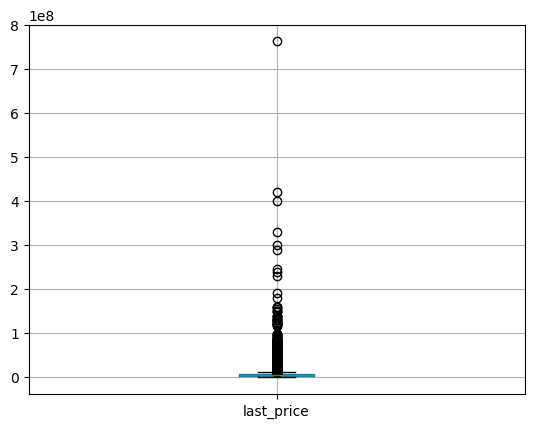

In [186]:
# Разделим на миллион, чтобы получить значения в читаемом формате и посмотрим, как распределяются данные по квартилям
print((data['last_price'] / 1000000).describe())
data.boxplot(column='last_price')
plt.show()

Из-за нескольких выбросов данные нечитаемы. Однако метод `describe` показывает нам, что 75% данных укладываются в 7 миллионов. Еще раз используем boxplot, ограничив ось y до 15 миллионов

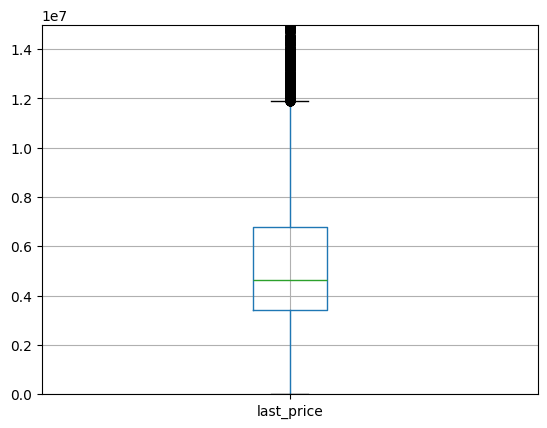

In [187]:
data.boxplot(column='last_price')
plt.ylim(0, 15000000)
plt.show()

Мы видим, что выбросы начинаются после ~12 миллионов

In [188]:
good_data = data.query('last_price < 12000000')
len(good_data.index)  # Смотрим, сколько данных являются "хорошими"

21656

Ранее, когда мы обрабатывали пропуски в `ceiling_height`, мы уже наткнулись на опечатки, где вместо 2.5м было написано 25м. Исправим аналогичные опечатки во всем датасете

count    21656.000000
mean         2.681638
std          0.286121
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max         22.600000
Name: ceiling_height, dtype: float64


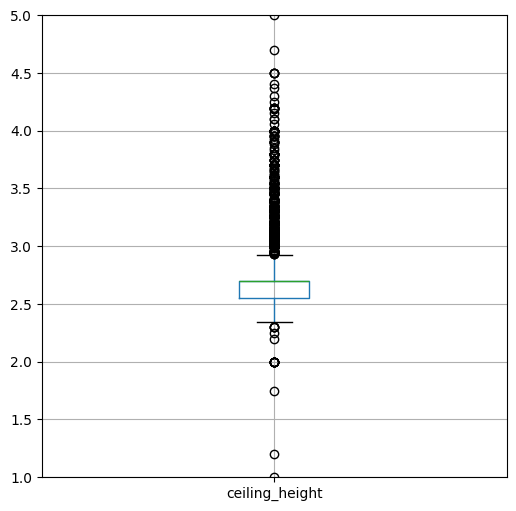

In [189]:
good_data.loc[good_data['ceiling_height'] >= 24, 'ceiling_height'] /= 10

print(good_data['ceiling_height'].describe())  # Посмотрим, как распределяются данные по квартилям

good_data.boxplot(column=['ceiling_height'], figsize=(6, 6))
plt.ylim(1, 5)
plt.show()

У нас возникает дилемма. Ящик с усами показывает, что выбросы начинаются после ~3м, однако существует малая часть элитной недвижимости, высота потолков которой может доходить до 4-х метров, так что данные выбросы обоснованы. Так как таких выбросов немного, в сравнении с общим количеством данных, то установим верхний предел в 3м, чтобы выбросы не влияли на исследовательский анализ 

In [190]:
good_data = good_data.query('ceiling_height >= 2.4 and ceiling_height <= 3')
len(good_data.index)  # Смотрим, сколько данных являются "хорошими"

20708

count    20708.000000
mean        52.482773
std         18.450273
min         12.000000
25%         38.700000
50%         48.200000
75%         62.500000
max        230.000000
Name: total_area, dtype: float64


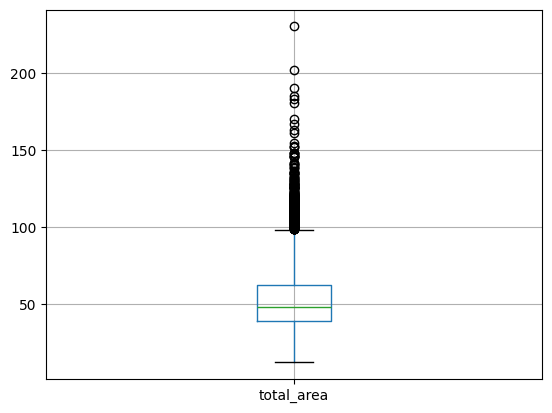

In [191]:
print(good_data['total_area'].describe())
good_data.boxplot('total_area')
plt.show()

Выбросы начинаются после 100м², так что ограничим "потолок" этим значением. Очевидно, что есть квартиры, у которых большая площадь, но так как этих квартир незначительное количество, то мы их отсеем для того, чтобы не было выбросов при исследовательском анализе

In [192]:
good_data = good_data.query('total_area <= 100')
len(good_data.index)  # Смотрим, сколько данных являются "хорошими"

20357

count    17960.000000
mean       169.023218
std        207.994784
min          1.000000
25%         43.000000
50%         89.000000
75%        213.000000
max       1580.000000
Name: days_exposition, dtype: float64


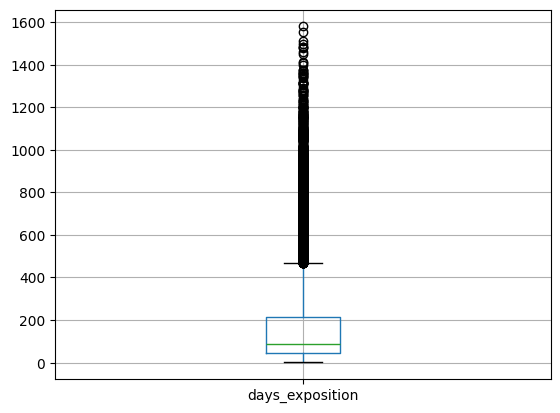

In [193]:
# Ранее в данном столбце мы заполняли пропуски значением -1, отфильтруем теперь эти столбцы, чтобы они не повлияли на описание данных
print(good_data[good_data['days_exposition'] >= 0]['days_exposition'].describe())
good_data[good_data['days_exposition'] >= 0].boxplot('days_exposition')
plt.show()

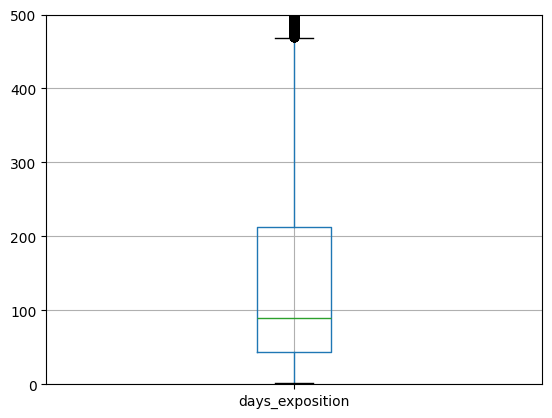

In [194]:
good_data[good_data['days_exposition'] >= 0].boxplot('days_exposition')  # Увеличим масштаб
plt.ylim(0, 500)
plt.show()

Выбросы начинаются после ~490 дней. Примем это значение за потолок и возьмем значения, находящиеся ниже него. 

In [195]:
good_data = good_data.query('days_exposition <= 490')
len(good_data.index)  # Проверяем, сколько строк у нас осталось

18973

К сожалению, в данном столбце было почти 1500 выбросов, однако оставшиеся данные мы используем лишь для исследовательского анализа

#### Вывод:
Мы создали отдельный датасет, по которому будем проводить исследовательский анализ данных. Мы обработали выбросы в следующих столбцах: `ceiling_height`, `days_exposition`, `floor`, `total_area`, `last_price`. Эти столбцы являются для нас критически важными для анализа, на выбросы в остальных столбцах мы можем не обращать внимания.
<br>
В датасете с данными, пригодными для анализа у нас осталось `18973` строк, что является `80%` от количества строк в изначальном датасете

### Вывод предобработки данных:
1. Мы обработали пропуски, оставив пропуски в следующих столбцах:
- В `airports_nearest` осталось `5386` пропусков
- В `city_centers_nearest` осталось `5386` пропусков
- В `parks_nearest` осталось `5998` пропусков
- В `ponds_nearest` осталось `5494` пропусков
<br>
Данные пропуски остались, потому что рядом с населенными пунктами нет аэропортов, парков, прудов, больших городов

2. Мы преобразовали `59` неявных дубликатов, путем удаления префиксов у названий населенных пунктов
3. Мы привели `6` столбцов к корректному типу данных
4. Мы обработали выбивающиеся значения в 4-х столбцах, после чего у нас осталось `80%` данных, пригодных для исследовательского анализа

## Добавление в таблицу новых столбцов

Последний шаг перед исследовательским анализом — добавление новых столбцов:
- `price_per_sqrm` – цена одного квадратного метра;
- `weekday_exposition` – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
- `month_exposition` – месяц публикации объявления;
- `year_exposition` – год публикации объявления;
- `floor_type` – тип этажа квартиры (значения — «первый», «последний», «другой»);
- `city_centers_nearest_km` – расстояние до центра города в километрах. 

In [196]:
# Считаем цену за квадратный метр
data['price_per_sqrm'] = data['last_price'] / data['total_area']
good_data['price_per_sqrm'] = good_data['last_price'] / good_data['total_area']

# Получаем день недели. 0 — понедельник, 6 — воскресенье
data['weekday_exposition'] = data[
    'first_day_exposition'].dt.weekday  # Почему здесь при вызове метода мы не прописываем () ?
good_data['weekday_exposition'] = good_data['first_day_exposition'].dt.weekday

# Получаем месяц публикации
data['month_exposition'] = data['first_day_exposition'].dt.month
good_data['month_exposition'] = good_data['first_day_exposition'].dt.month

# Получаем год публикации
data['year_exposition'] = data['first_day_exposition'].dt.year
good_data['year_exposition'] = good_data['first_day_exposition'].dt.year


# Устанавливаем тип этажа
def floor_type_categorize(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row[
        'floors_total']:  # Используем elif, чтобы в одноэтажном доме этаж не был определен, как последний
        return 'последний'
    else:
        return 'другой'


data['floor_type'] = data.apply(floor_type_categorize, axis=1)
good_data['floor_type'] = good_data.apply(floor_type_categorize, axis=1)

# Считаем расстояние до центра в километрах и округляем его
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)
good_data['city_centers_nearest_km'] = round(good_data['city_centers_nearest'] / 1000)

# Выводим новые столбцы
good_data[['price_per_sqrm', 'weekday_exposition', 'month_exposition', 'year_exposition', 'floor_type',
           'city_centers_nearest_km']].head(10)

,price_per_sqrm,weekday_exposition,month_exposition,year_exposition,floor_type,city_centers_nearest_km
1,82920.792079,1,12,2018,первый,19.0
5,95065.789474,0,9,2018,другой,NaN
6,99195.710456,3,11,2017,другой,19.0
7,110544.692737,3,4,2019,другой,12.0
8,87454.764777,2,5,2018,другой,NaN
9,88524.590164,6,2,2017,другой,15.0
10,127525.252525,3,11,2017,другой,14.0
11,75000.000000,0,8,2018,другой,52.0
12,72037.037037,3,6,2016,последний,NaN
13,82943.925234,5,7,2017,последний,33.0


#### Вывод:
Мы добавили 6 новых столбцов, которые помогут нам при анализе
- `price_per_sqrm`, `city_centers_nearest_km` — позволит узнать, как меняется цена за квадратный метр в зависимости от населенного пункта, удаления от центра города
- `weekday_exposition` – позволит узнать, как день публикации влияет на скорость продажи квартир. Если бы у нас были данные по количеству просмотров объявления, то мы могли бы узнать, как день недели влияет и на эту метрику
- `month_exposition` – позволит узнать, как варьируется цена в зависимости от времени года, и как оно влияет на скорость продажи
- `year_exposition` – позволит узнать, как менялась цена по годам
- `floor_type` – позволит узнать, как этаж влияет на стоимость квартиры

## Исследовательский анализ данных

### Изучение параметров

<br>

Изучим и проанализируем следующие столбцы:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка.

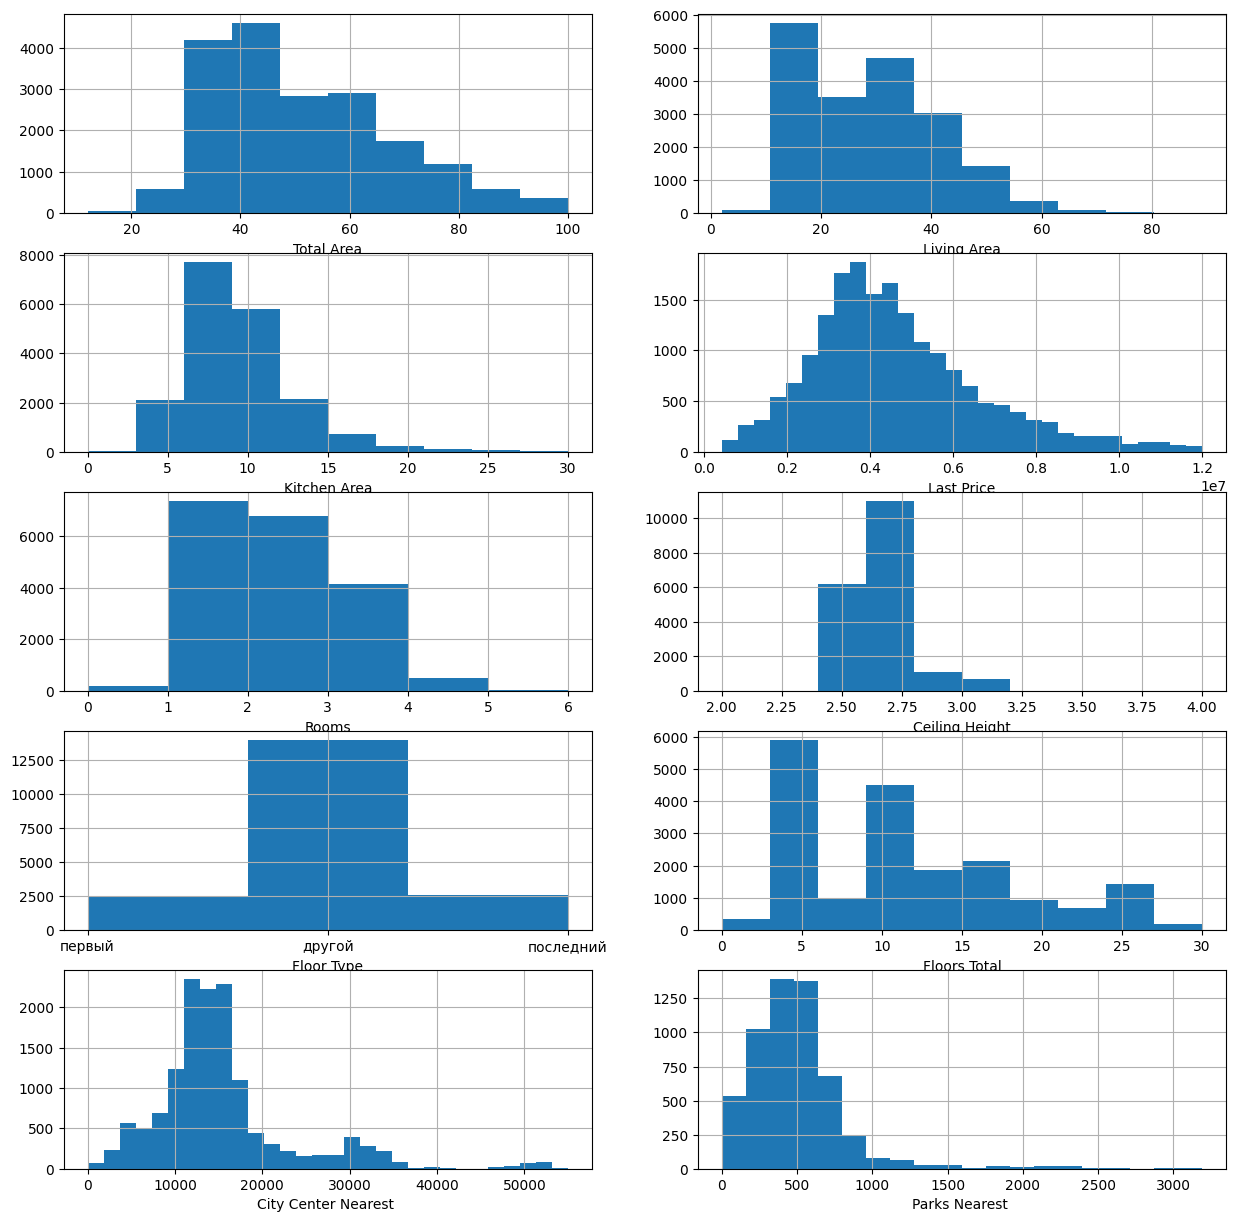

In [197]:
plt.figure(figsize=(15, 15))

plt.subplot(5, 2, 1)
plt.grid()
plt.hist(good_data['total_area'], bins=10)
plt.xlabel('Total Area')

plt.subplot(5, 2, 2)
plt.grid()
plt.hist(good_data['living_area'], bins=10)
plt.xlabel('Living Area')

plt.subplot(5, 2, 3)
plt.grid()
plt.hist(good_data['kitchen_area'], bins=10, range=(0, 30))
plt.xlabel('Kitchen Area')

plt.subplot(5, 2, 4)
plt.grid()
plt.hist(good_data['last_price'], bins=30)
plt.xlabel('Last Price')

plt.subplot(5, 2, 5)
plt.grid()
plt.hist(good_data['rooms'], bins=6)
plt.xlabel('Rooms')

plt.subplot(5, 2, 6)
plt.grid()
plt.hist(good_data['ceiling_height'], bins=10, range=(2, 4))
plt.xlabel('Ceiling Height')

plt.subplot(5, 2, 7)
plt.grid()
plt.hist(good_data['floor_type'], bins=3)
plt.xlabel('Floor Type')

plt.subplot(5, 2, 8)
plt.grid()
plt.hist(good_data['floors_total'], bins=10, range=(0, 30))
plt.xlabel('Floors Total')

plt.subplot(5, 2, 9)
plt.grid()
plt.hist(good_data['city_centers_nearest'], bins=30, range=(0, 55000))
plt.xlabel('City Center Nearest ')

plt.subplot(5, 2, 10)
plt.grid()
plt.hist(good_data['parks_nearest'], bins=20)
plt.xlabel('Parks Nearest ')


plt.show()

#### Вывод:

- `общая площадь`<br>
Присутствует большое количество лотов, которые можно сравнить со студиями. Так же есть небольшое количество лотов, площадь которых ниже площади студии, скорее всего это коммерческая недвижимость. Больше всего лотов, у которых площадь `40-45м²`. После `60м²` количество лотов заметно падает<br><br>
- `жилая площадь`<br>
Выводы аналогичны выводам про жилую площадь. Стоит заметить, что в гистограмме есть околонулевой столбец, так что рождается гипотеза, что это коммерческая недвижимость. Данный столбец подчиняется распределению Пуассона. Больше всего превалирую лоты, жилая площадь которых составляет менее `20м²`. Ссылаясь на вывод, сделанный по общей площади, мы можем предположить, что в большинстве лотов площадь санузла вместе с кухней занимает половину общей площади<br><br>
- `площадь кухни`<br>
В большинстве лотов кухня занимает `6-10м²`. Стоит обратить внимание на околонулевой выброс. Раньше мы объяснили это тем, что кухня может быть совмещена с гостиной, кухня может отсутствовать в лоте, или же в лоте еще не сделан ремонт<br><br>  
- `цена объекта`<br>
В первую очередь объясним, что `1е7` означает 7 нулей после запятой. Большинство лотов лежит в диапазоне цены `от 2 500 000 до 6 000 000`. После `8 000 000` количество лотов существенно сокращается, так что мы можем считать такие лоты необычайно дорогими. `~4 000 000` является медианной ценой<br><br>
- количество комнат<br>
Больше всего лотов содержат 1 или 2 комнаты. Чуть реже встречаются лоты с 3-мя комнатами. Лоты, с 4-мя комнатами можно считать необычайно редкими. Стоит отметить, что на гистограмме есть небольшое количество лотов с 0 комнатами, это может значит, что лот являет собой либо коммерческую недвижимость, либо квартиру с открытой планировкой<br><br> 
- `высота потолков`<br>
Медианным и сильно превалирующем значением является `2.7м`, лоты, с высотой потолка больше этого значения можно назвать необычайно редкими<br><br>  
- `тип этажа квартиры`<br>
Больше всего лотов находятся не на первом и последнем этажах. Так же стоит отметить, что лотов, находящихся на последнем этаже чуть больше, чем лотов, находящихся на первом<br><br>
- `общее количество этажей в доме`<br>
Больше всего лотов с общим количеством этажей равным 5. Рождается гипотеза, что лоты размещены в "сталинках". Вторыми по частоте являются лоты с общим количеством этажей в доме, равной 12. Стоит обратить внимание на околонулевое значение, скорее всего это объявления о продаже домов в частных секторах<br><br>
- `расстояние до центра города в метрах`<br>
Большинство лотов располагается на удаленности `14-18км` от центра города. Редкими можно считать лоты, которые располагаются на удалении больше `20км` от центра города. Так же крайне редки лоты, которые находятся "почти в центре"<br><br>
- `расстояние до ближайшего парка`<br>
Почти все лоты находятся на расстоянии в `~3км` от ближайшего парка. Существует небольшая группа, для которой парк находится в пределе `1км` 

### Изучение скорости продажи квартир

Среднее значение: 121.21844835907336
Медианное значение: 77.0


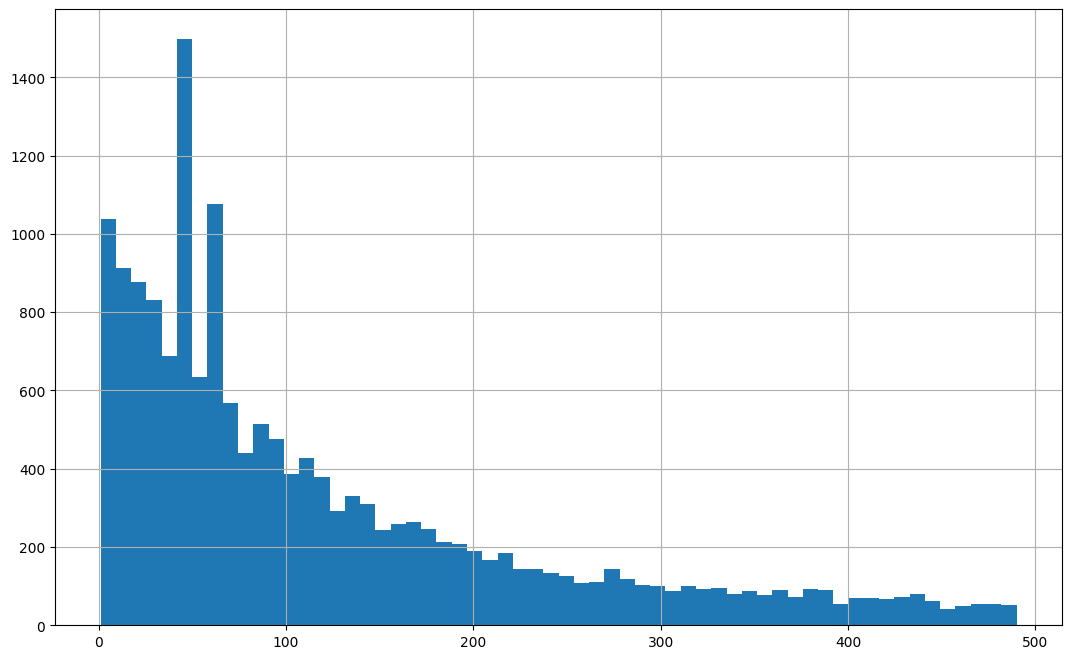

In [198]:
# Так как раньше мы заменили пропуски на "-1", то создадим фильтр
print('Среднее значение:', good_data[good_data['days_exposition'] >= 0]['days_exposition'].mean())
print('Медианное значение:', good_data[good_data['days_exposition'] >= 0]['days_exposition'].median())

good_data[good_data['days_exposition'] >= 0]['days_exposition'].hist(bins=60, figsize=(13, 8))
plt.show()

 Большее количество квартир продается в пределах 77 дней.
<br>
<br>
Как мы видим по гистограмме, После ~170 дней количество продаж существенно снижается. Пока что примем это число, как границу, после которой будем считать продажи необычно долгими. Так же ниже 60-ти данные рядеют. Выброс около нуля остается. Увеличим масштаб

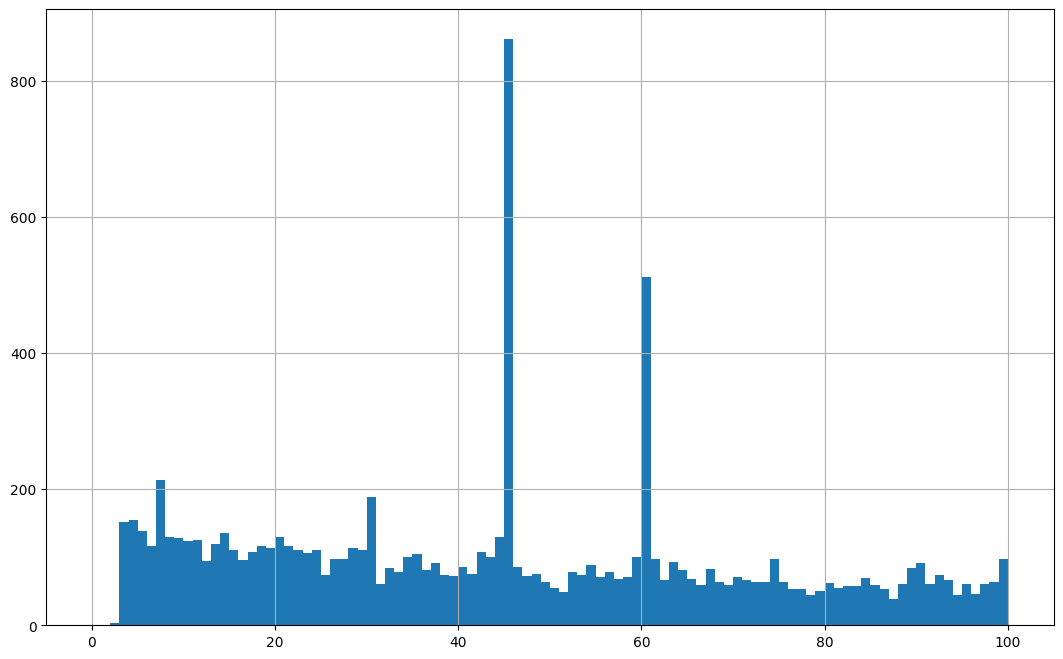

In [199]:
good_data[good_data['days_exposition'] >= 0]['days_exposition'].hist(bins=100, range=(0, 100), figsize=(13, 8))
plt.show()

Мы наблюдаем выбросы на `45-м` и `60-м` днях. Потенциально данные выбросы объясняются тем, что покупателю необходимо собрать документы и дождаться одобрения ипотеки. Еще одним из вариантов является то, что цена квартиры немного снижается после определенного количества дней. Это объясняется особенностью функционирования системы размещения объявлений. Убедиться в этом можно по ссылку ниже:
<br>
https://yandex.ru/support/realty/owner/home/add-ads-housing.html

-0.005339576033940791


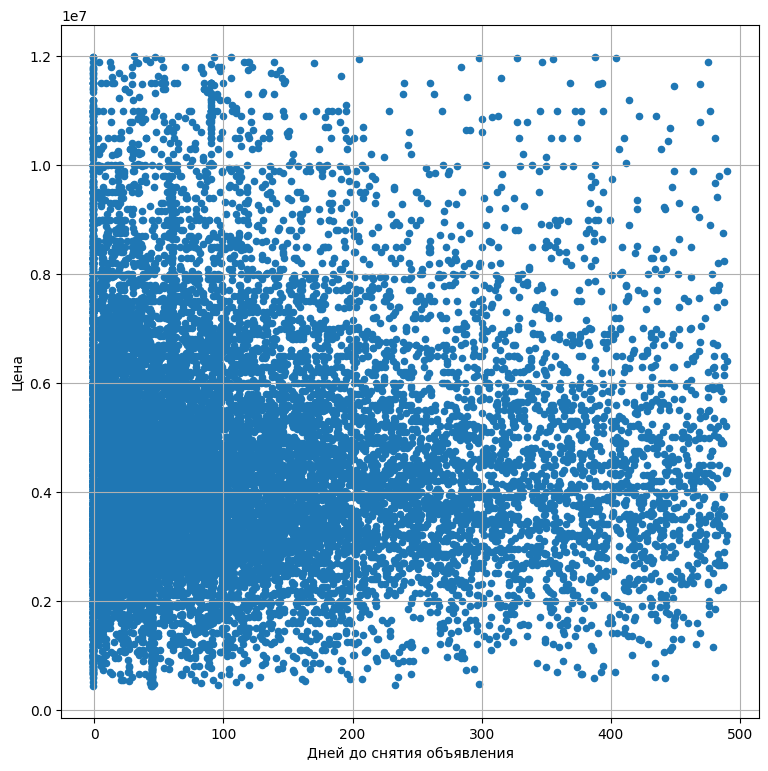

In [200]:
print(good_data['days_exposition'].corr(good_data['last_price']))
good_data.plot(x='days_exposition', y='last_price', kind='scatter',  
                           xlabel='Дней до снятия объявления', ylabel='Цена',
                           grid=True, figsize=(9, 9))

plt.show()

Корреляция составляет `-0.005`. То, что она отрицательная — показывает, что чем больше дней "висит" объявление, тем ниже его цена, однако она слишком мала, так что мы не можем подтвердить нашу гипотезу

count    16576.000000
mean       121.218448
std        115.201672
min          1.000000
25%         39.000000
50%         77.000000
75%        172.000000
max        490.000000
Name: days_exposition, dtype: float64


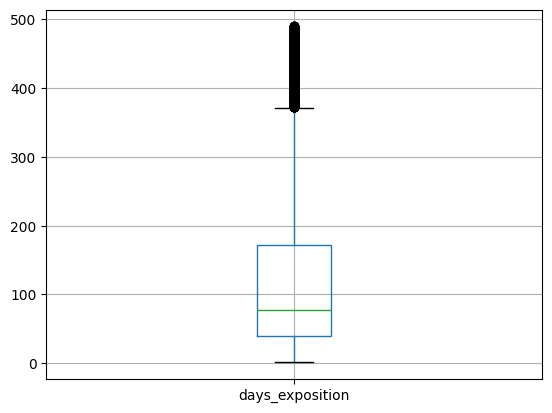

In [201]:
print(good_data.query('days_exposition >= 0')['days_exposition'].describe())
good_data[good_data['days_exposition'] >= 0].boxplot(column='days_exposition')
plt.show()

Ящик с усами подсказывает нам, какие продажи можно считать необычайно быстрыми и необычайно долгими.
- `39 дней` — это порог, ниже которого продажи мы можем считать необычайно быстрыми, так как всего 25% данных укладываются в этот порог
- `172 дня` — это порог, после которого продажи мы можем считать необычайно долгими, так как всего 25% данных превышают этот порог

В среднем, лоты продаются за `121 день`, однако медианное значение составляет `77 дней`. На среднее значение влияют лоты, которые продаются необычайно долго

#### Посмотрим, как скорость продажи зависит от дня, месяца, и года

In [202]:
# Проверяем зависимость от дня
good_data_pivot_table = good_data[good_data['days_exposition'] >= 0].pivot_table(index='weekday_exposition',
                                                                                 values='days_exposition',
                                                                                 aggfunc=('count', 'mean', 'median'))
good_data_pivot_table = good_data_pivot_table.rename(index={
    0: 'Понедельник',
    1: 'Вторник',
    2: 'Среда',
    3: 'Четверг',
    4: 'Пятница',
    5: 'Суббота',
    6: 'Воскресенье'
})
good_data_pivot_table

,count,mean,median
weekday_exposition,,,
Понедельник,2484,125.668680,82.0
Вторник,2898,119.327812,74.0
Среда,2731,124.094837,79.0
Четверг,2982,121.180080,79.0
Пятница,2899,121.665057,77.0
Суббота,1364,119.461877,82.0
Воскресенье,1218,111.189655,67.0


Мы видим, что больше всего объявлений выставляется в будние дни. Количество объявлений примерно одинаковое, однако можно выделить `Четверг`, как "рекордсмена" по количеству объявлений. Еще стоит отметить, что быстрее всего закрывались сделки, которые были выставлены в `Воскресенье`

In [203]:
# Проверяем зависимость от месяца
good_data_pivot_table = good_data[good_data['days_exposition'] >= 0].pivot_table(index='month_exposition',
                                                                                 values='days_exposition',
                                                                                 aggfunc=('count', 'mean', 'median'))
good_data_pivot_table = good_data_pivot_table.rename(index={
    1: 'Январь',
    2: 'Февраль',
    3: 'Март',
    4: 'Апрель',
    5: 'Май',
    6: 'Июнь',
    7: 'Июль',
    8: 'Август',
    9: 'Сентябрь',
    10: 'Октябрь',
    11: 'Ноябрь',
    12: 'Декабрь'
})

good_data_pivot_table

,count,mean,median
month_exposition,,,
Январь,1050,121.092381,71.0
Февраль,1883,118.047265,71.0
Март,1552,120.488402,74.5
Апрель,1219,139.129614,106.0
Май,875,145.340571,110.0
Июнь,1340,131.744776,93.0
Июль,1272,122.867138,76.0
Август,1338,113.023169,71.0
Сентябрь,1486,111.456931,72.0


Мы наблюдаем, что меньше всего лотов выставляется на продажу зимой и летом. Дольше всего продаются лоты, которые были выставлены в апреле, мае, июне. Лоты, которые были выставлены в остальные месяцы продаются в среднем одинаково за 70-80 дней, что еще раз подтверждает правдивость найденного нами медианного значения 

In [204]:
# Проверяем зависимость от года
good_data_pivot_table = good_data[good_data['days_exposition'] >= 0].pivot_table(index='year_exposition',
                                                                                 values='days_exposition',
                                                                                 aggfunc=('count', 'mean', 'median'))
good_data_pivot_table

,count,mean,median
year_exposition,,,
2015,367,344.656676,343.0
2016,1771,197.063806,164.0
2017,6644,133.558850,90.0
2018,6806,90.526741,60.0
2019,988,30.706478,23.0


Мы наблюдаем, что с течением времени, увеличилось количество сделок по недвижимости, и сократилось время продажи. В 2019 году сильно сократилось количество сделок, но так как нет данных после 2019-го года, рождается гипотеза, что датасет был получен в начале 2019-го года. Можно сказать, что спрос на недвижимость растет 

#### Вывод:

- `Необычайно быстрыми` являются продажи, которые были завершены в пределах `39` дней
- `Необычайно долгими` являются продажи, которые были завершены от `172` дня
- В среднем лоты продаются за `121` день, однако медианным значением является `77` дней

<br>

- Больше всего объявлений размещаются в будние дни, а быстрее всего закрываются объявления, которые были выставлены в `Воскресенье`
- Меньше всего объявлений размещаются зимой и летом. Дольше всего продаются лоты, которые были выставлены в `Апреле`, `Мае`, `Июне`
- C течением времени спрос на недвижимость растет, а завершение сделок происходит быстрее

### Факторы, влияющие на полную стоимость лота

Определим факторы, которые больше всего влияют на полную стоимость лота, потенциально это следующие параметры:
- общая площадь;
- жилая площадь;
- площадь кухни;
- количество комнат;
- тип этажа, на котором расположена квартира (первый, последний, другой);
- дата размещения (день недели, месяц, год).
- удаленность от центра города
- расстояние до ближайшего парка
- расстояние до ближайшего пруда

Для этого воспользуемся методом `scatter_matrix`

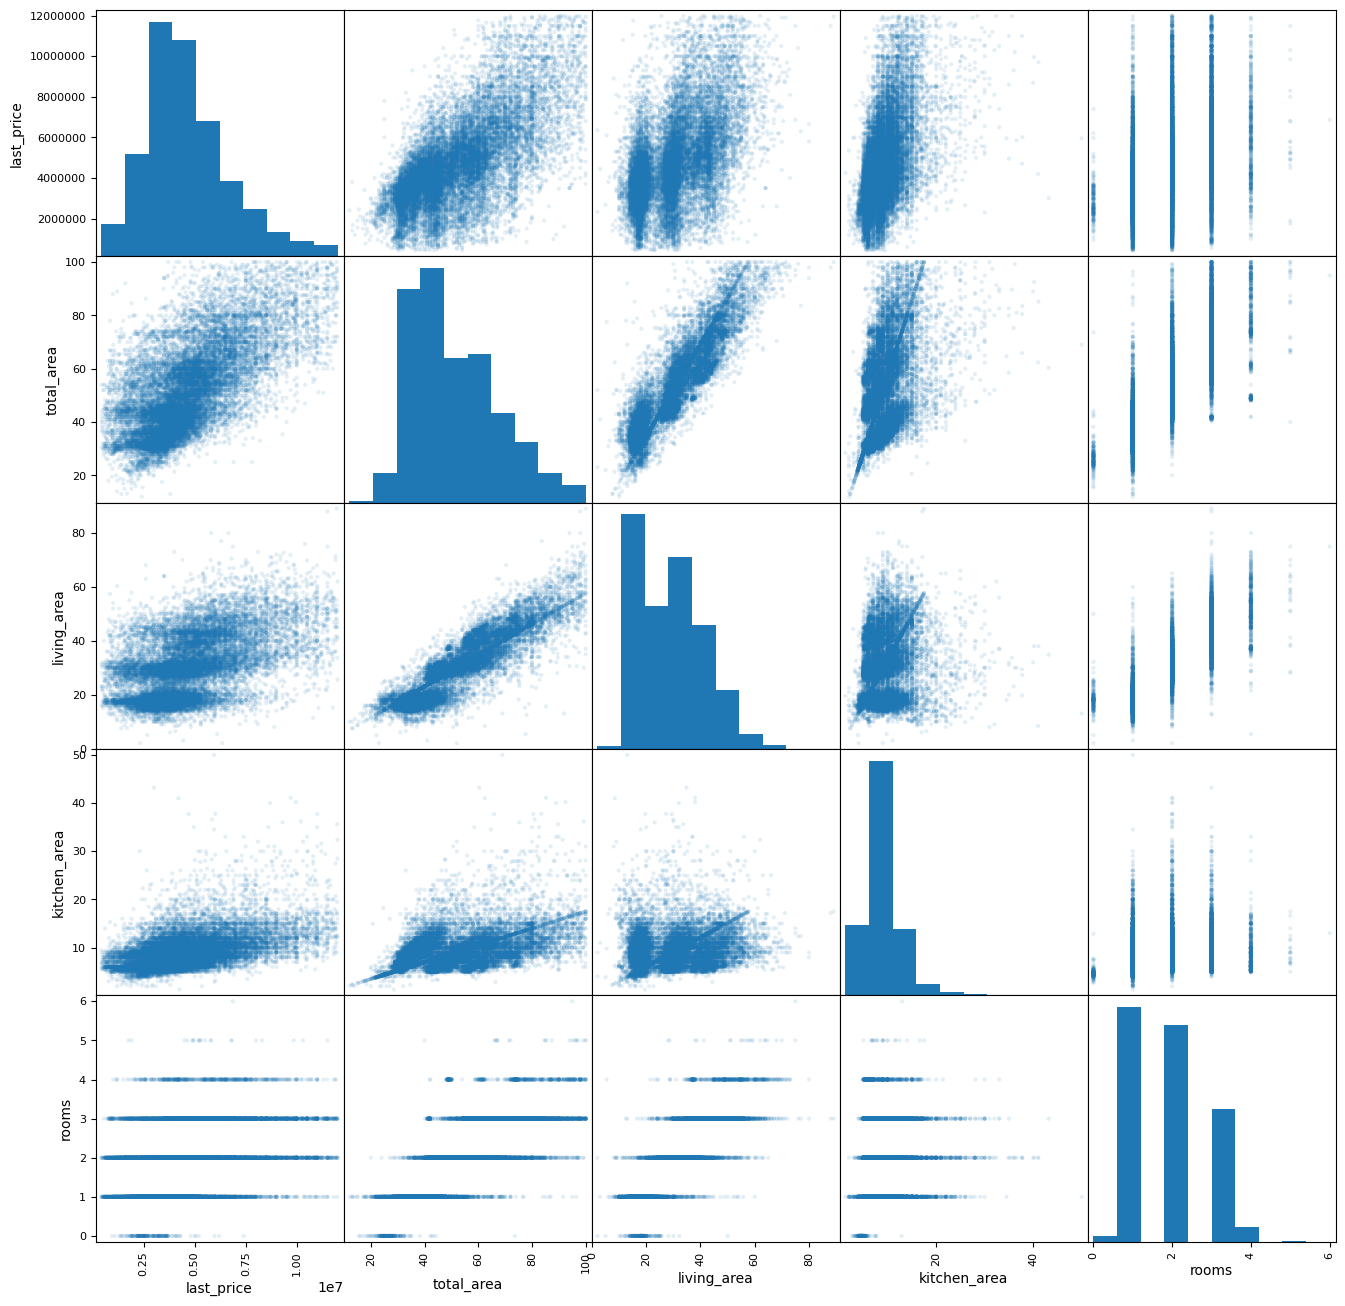

In [205]:
# Сначала посмотрим на параметры самого лота
pd.plotting.scatter_matrix(
    good_data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type']],
    figsize=(16, 16),
    alpha=0.12)
plt.show()

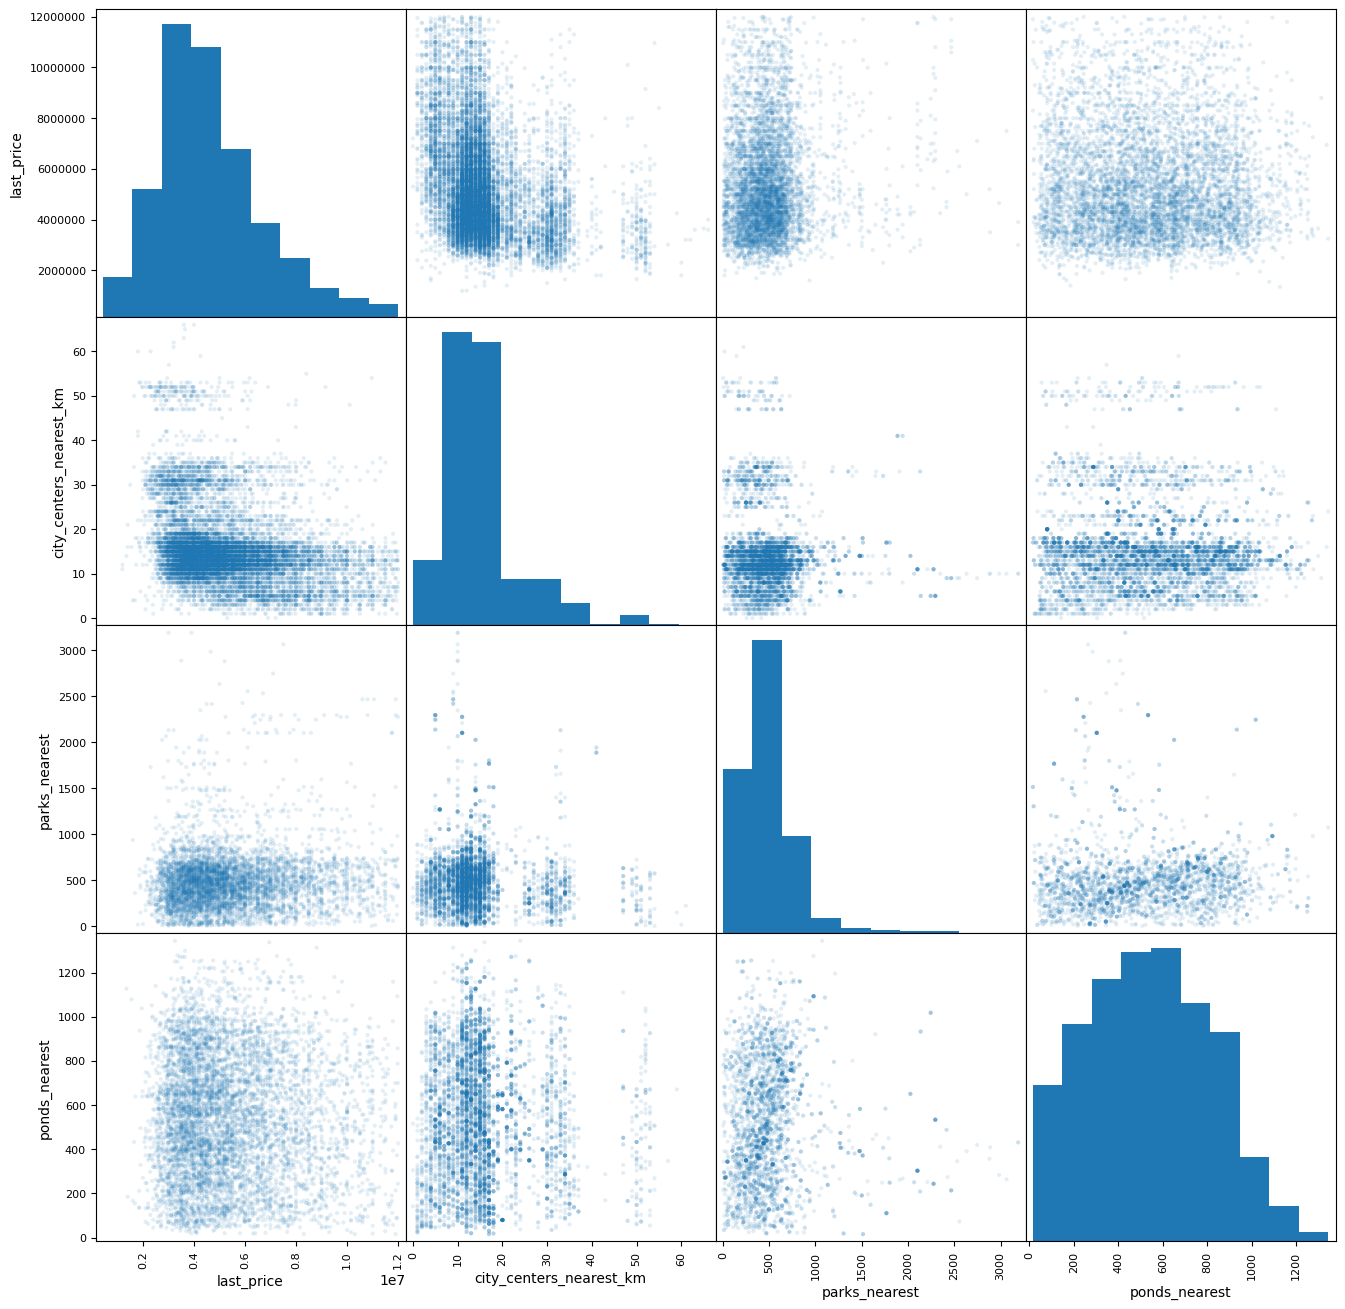

In [206]:
# Теперь посмотрим на зависимость цены от географического положения лота
pd.plotting.scatter_matrix(
    good_data[['last_price', 'city_centers_nearest_km', 'parks_nearest', 'ponds_nearest']],
    figsize=(16, 16),
    alpha=0.12)
plt.show()

На первый взгляд больше всего на цену влияет общая площадь. Жилая площадь и площадь кухни так же имеют небольшое влияние, однако эти 2 столбца включены в общую стоимость. Рассмотрим корреляцию между ценой и общей площадью детальнее.
<br><br>
Количество комнат тоже влияет на цену. Мы видим, как редеет "яркость" линии для одного этажа, по мере повышения цены. Для 4-х комнат большее количество точек находится выше, нежели для 1 комнаты. Для 2-х и 3-х комнат данные распределены почти равномерно, однако стоит обратить внимание на то, как количество комнат коррелирует с общей площадью. В случае с 2-х и 3-х комнат Общая площадь возрастает, что опять отсылает нас к графику корреляции между ценой и общей площадью
<br><br>
Расстояние до центра и парка тоже влияет на стоимость лота. С расстоянием до пруда немного сложнее, мы видим примерно равномерное распределение точек, так что мы можем сказать, что данный параметр не сильно влияет на цену лота. В графиках для парков и прудов мы видим всплеск около 3000, однако выше мы выяснили, что причиной этого является наличие огромного количества лотов, расположенных как раз на этом расстоянии

In [207]:
corr_df = good_data.loc[:, good_data.dtypes == 'int64']
corr_df = corr_df.join(good_data.loc[:, good_data.dtypes == 'float64'])
corr_df.corr()['last_price'].sort_values(ascending=False)

last_price                 1.000000
total_area                 0.670969
price_per_sqrm             0.651717
living_area                0.530931
kitchen_area               0.488882
rooms                      0.400551
ceiling_height             0.369001
ponds_around3000           0.263508
floors_total               0.258012
parks_around3000           0.221605
total_images               0.180076
floor                      0.178561
balconies                  0.095915
parks_nearest              0.071842
days_exposition           -0.005340
airports_nearest          -0.016069
ponds_nearest             -0.035202
city_centers_nearest      -0.308804
city_centers_nearest_km   -0.309052
Name: last_price, dtype: float64

Больше всего на цену влияют следующие парамеры:
- `total_area` — `living_area` `kitchen_area` являются "подпараметрами" общей площади, так что мы не учитываем конкретно их корреляцию с ценой 
- `rooms` 
- `ceiling_height`
- `city_centers_nearest` — корреляция тут отрицательная, что означает чем больше значение, тем меньше цена. То есть цена уменьшается по мере удаления от центра

0.6709692053189552


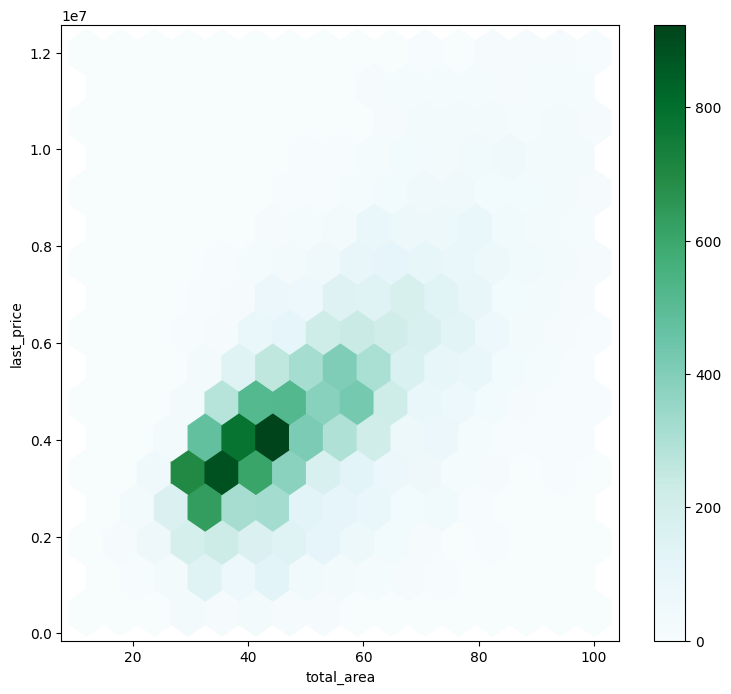

In [208]:
print(good_data['total_area'].corr(good_data['last_price']))

good_data.plot(x='total_area', y='last_price', figsize=(9, 8), gridsize=15, kind='hexbin')
plt.show()

Посмотрим, как цена менялась по дням, месяцам, годам

In [209]:
# Проверяем зависимость от дня
good_data_pivot_table = (good_data.pivot_table(index='weekday_exposition',
                                              values='last_price',
                                              aggfunc=('mean', 'median'))
                         )
good_data_pivot_table = good_data_pivot_table.rename(index={
    0: 'Понедельник',
    1: 'Вторник',
    2: 'Среда',
    3: 'Четверг',
    4: 'Пятница',
    5: 'Суббота',
    6: 'Воскресенье'
}).reset_index()
good_data_pivot_table

,weekday_exposition,mean,median
0,Понедельник,4.677274e+06,4300000.0
1,Вторник,4.677277e+06,4300000.0
2,Среда,4.646663e+06,4300000.0
3,Четверг,4.663425e+06,4290000.0
4,Пятница,4.634702e+06,4250000.0
5,Суббота,4.560031e+06,4290000.0
6,Воскресенье,4.634043e+06,4266470.5


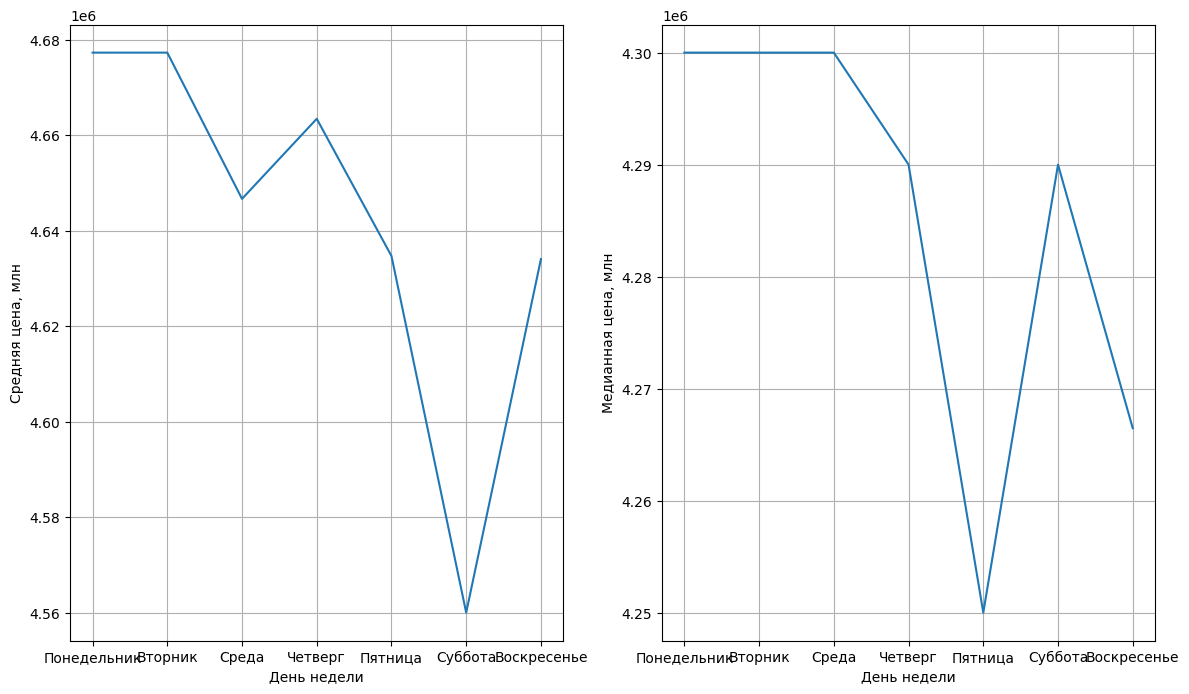

In [210]:
plt.figure(figsize=(14, 8))

plt.subplot(1,2,1,)
plt.grid()
plt.xlabel('День недели')
plt.ylabel('Средняя цена, млн')
plt.plot(good_data_pivot_table['weekday_exposition'], good_data_pivot_table['mean'])

plt.subplot(1,2,2)
plt.grid()
plt.xlabel('День недели')
plt.ylabel('Медианная цена, млн')
plt.plot(good_data_pivot_table['weekday_exposition'], good_data_pivot_table['median'])

plt.show()

Мы наблюдаем, что самые дешевые лоты были размещены в пятницу, а самые дорогие сделки совершались с понедельника по среду. Однако стоит заметить, что разница составляет всего 50 000, что в масштабе полной цены не существенно. Возможные причины — лоты, размещенные с понедельника по среду, были размещены риэлтором, который повысил цену для своей выгоды

In [211]:
# Проверяем зависимость от месяца
good_data_pivot_table = good_data[good_data['days_exposition'] >= 0].pivot_table(index='month_exposition',
                                                                                 values='days_exposition',
                                                                                 aggfunc=('count', 'mean', 'median'))
good_data_pivot_table = good_data_pivot_table.rename(index={
    1: 'Январь',
    2: 'Февраль',
    3: 'Март',
    4: 'Апрель',
    5: 'Май',
    6: 'Июнь',
    7: 'Июль',
    8: 'Август',
    9: 'Сентябрь',
    10: 'Октябрь',
    11: 'Ноябрь',
    12: 'Декабрь'
}).reset_index()

good_data_pivot_table

,month_exposition,count,mean,median
0,Январь,1050,121.092381,71.0
1,Февраль,1883,118.047265,71.0
2,Март,1552,120.488402,74.5
3,Апрель,1219,139.129614,106.0
4,Май,875,145.340571,110.0
5,Июнь,1340,131.744776,93.0
6,Июль,1272,122.867138,76.0
7,Август,1338,113.023169,71.0
8,Сентябрь,1486,111.456931,72.0
9,Октябрь,1629,117.251688,76.0


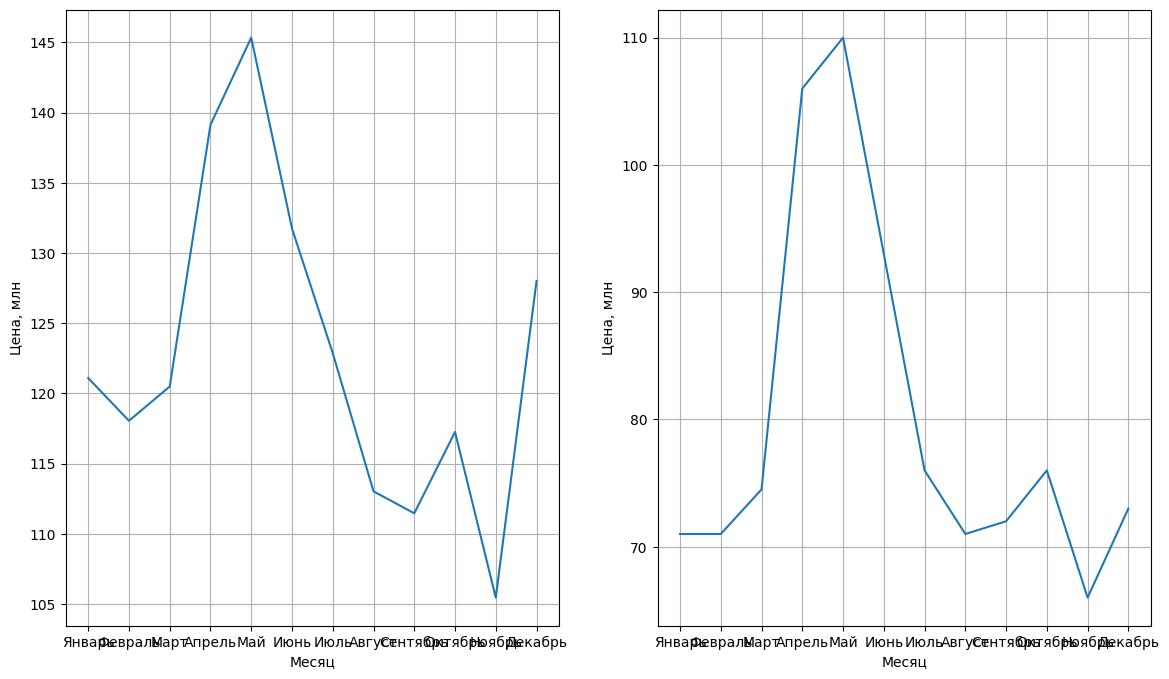

In [212]:
plt.figure(figsize=(14, 8))

plt.subplot(1,2,1,)
plt.grid()
plt.xlabel('Месяц')
plt.ylabel('Цена, млн')
plt.plot(good_data_pivot_table['month_exposition'], good_data_pivot_table['mean'])

plt.subplot(1,2,2)
plt.grid()
plt.xlabel('Месяц')
plt.ylabel('Цена, млн')
plt.plot(good_data_pivot_table['month_exposition'], good_data_pivot_table['median'])

plt.show()

Самые дорогие сделки совершались в Апреле и Мае, в остальные месяцы цена сделки была примерно одинаковой

In [213]:
# Проверяем зависимость от года
good_data_pivot_table = (good_data.pivot_table(index='year_exposition',
                                              values='last_price',
                                              aggfunc=('mean', 'median'))
                         .reset_index())

good_data_pivot_table

,year_exposition,mean,median
0,2014,6.491429e+06,7500000.0
1,2015,4.715462e+06,4300000.0
2,2016,4.564717e+06,4150000.0
3,2017,4.580120e+06,4182500.0
4,2018,4.620458e+06,4290000.0
5,2019,4.975163e+06,4700000.0


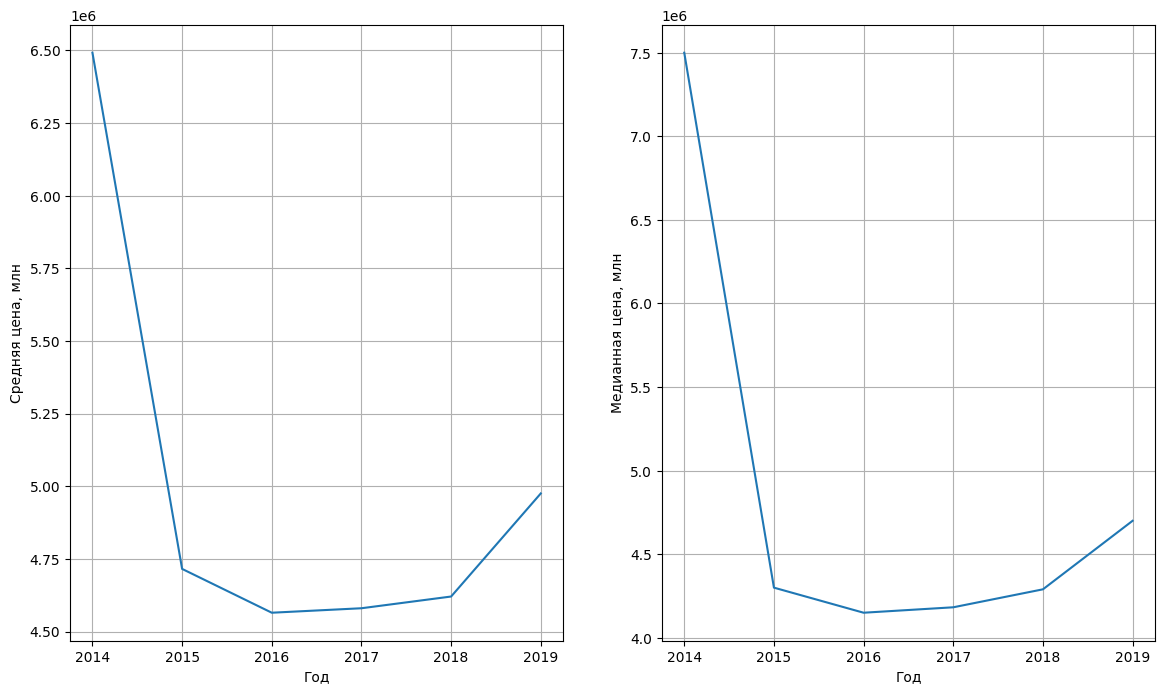

In [214]:
plt.figure(figsize=(14, 8))

plt.subplot(1,2,1,)
plt.grid()
plt.xlabel('Год')
plt.ylabel('Средняя цена, млн')
plt.plot(good_data_pivot_table['year_exposition'], good_data_pivot_table['mean'])

plt.subplot(1,2,2)
plt.grid()
plt.xlabel('Год')
plt.ylabel('Медианная цена, млн')
plt.plot(good_data_pivot_table['year_exposition'], good_data_pivot_table['median'])

plt.show()

In [215]:
# Проверям, почему медианная цена в 2014 такая большая
good_data[good_data['year_exposition'] == 2014]['last_price'].count()

np.int64(7)

Мы наблюдаем "выброс" в 2014 году. Так как в том году было всего 7 объявлений, то высокая цена одной сделки могла сильно повлиять на медианное значение.
В период 2015-2016 цена недвижимости падала, после чего начала расти. Особенно сильно цены выросли с 2018 по 2019 год

In [216]:
good_data_pivot_table = (good_data.pivot_table(index='floor_type',
                                              values='last_price',
                                              aggfunc=('mean', 'median'))
                         .reset_index())

good_data_pivot_table

,floor_type,mean,median
0,другой,4.852430e+06,4499499.5
1,первый,3.928527e+06,3699000.0
2,последний,4.224309e+06,3900000.0


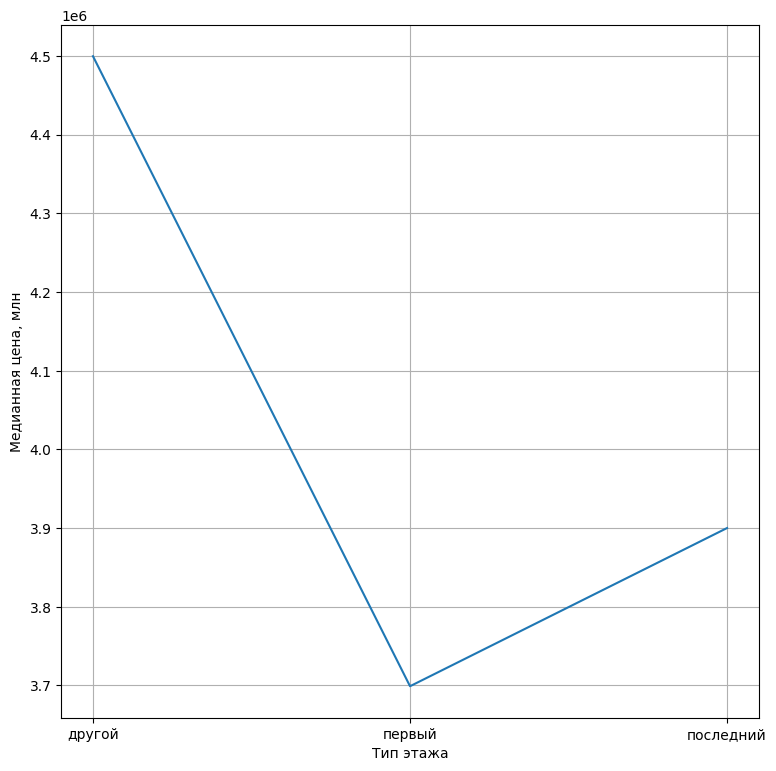

In [217]:
plt.figure(figsize=(9,9))
plt.grid()
plt.xlabel('Тип этажа')
plt.ylabel('Медианная цена, млн')
plt.plot(good_data_pivot_table['floor_type'], good_data_pivot_table['median'])

plt.show()

Мы можем наблюдать, что медианная цена лотов, находящихся на первом этаже — дешевле всего. Дороже всего лоты. которые находятся не на первых и не на последних этажах.

In [218]:
good_data_pivot_table = (good_data.pivot_table(index='floor',
                                              values='last_price',
                                              aggfunc=('mean', 'median'))
                         .reset_index())

good_data_pivot_table.head(5)

,floor,mean,median
0,1,3.928527e+06,3699000.0
1,2,4.364388e+06,4000000.0
2,3,4.499640e+06,4100000.0
3,4,4.535847e+06,4150000.0
4,5,4.342715e+06,4000000.0


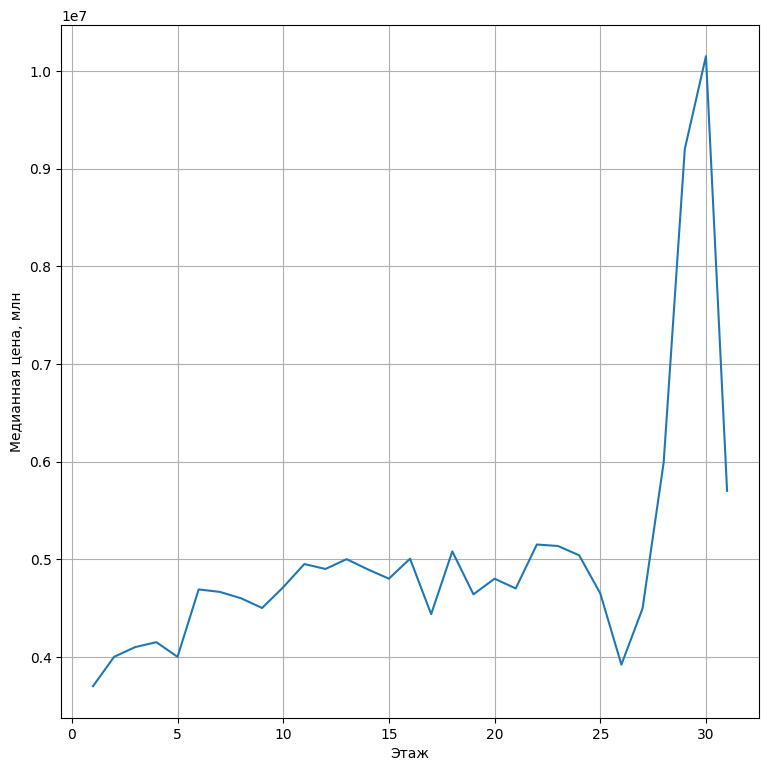

In [219]:
plt.figure(figsize=(9,9))
plt.grid()
plt.xlabel('Этаж')
plt.ylabel('Медианная цена, млн')
plt.plot(good_data_pivot_table['floor'], good_data_pivot_table['median'])

plt.show()

Если рассмотривать покупку непосредственно по этажам, то самая дорогая покупка для лотов, находящихся на 30 этаже. После него идут лоты, которые находятся на 10-23 этажах, с редкими просадками в районе 17-х этажей. Обобщив 2 последних графика, мы можем сделать вывод, что покупатели предпочитают более высокие этажи в угоду первых, однако не любят жить на последнем этаже

#### Вывод:

Больше всего на цену влияют следующие параметры:
- `total_area` — `living_area` `kitchen_area` являются "подпараметрами" общей площади, так что мы не учитываем конкретно их корреляцию с ценой 
- `rooms` 
- `ceiling_height`
- `city_centers_nearest`
- В среднем, лоты, находящиеся на первом этаже самые дешевые. Дальше по дороговизне находятся лоты, находящиеся на последнем этаже. Самыми дорогими являются объекты, которые распологаются от второго до предпоследнего этажа. Похупатели предпочитают более высокие этажи в угоду первых, однако не любят жить на последнем этаже.

Самые дорогие лоты продавались в `Апреле` и `Мае`. Цена недвижимости начала расти, начиная с 2016-го года. Очень резкое возрастание цены произошло с 2018 по 2019 годы 

### Средняя стоимость квадратного метра в самых населенных пунктах

In [220]:
good_data_pivot_table = (good_data
                         .pivot_table(index='locality_name', values='price_per_sqrm',
                                      aggfunc=('count', 'mean', 'median'))
                         .sort_values('count', ascending=False))
good_data_pivot_table.columns = ['sales', 'mean_price', 'median_price']
good_data_pivot_table.head(10)

,sales,mean_price,median_price
locality_name,,,
Санкт-Петербург,11847,105574.961672,102127.659574
Мурино,553,86386.560110,86351.351351
Кудрово,431,95359.765746,96119.929453
Шушары,408,78685.478878,76747.967480
Всеволожск,356,67086.445804,65538.631852
Колпино,309,75256.375684,74657.534247
Парголово,308,90181.890455,91472.565784
Пушкин,297,99880.898960,98437.500000
Гатчина,272,68682.282364,67671.510409


Стоит заметить, что срендняя и медианная цены не сильно отличаются друг от друга, это означает,что распределение близко к нормальному. Еще стоит отметить, что не наблюдается особой корреляции между средней ценой и количеством объявлений. Посмотрим, как они зависят друг от друга

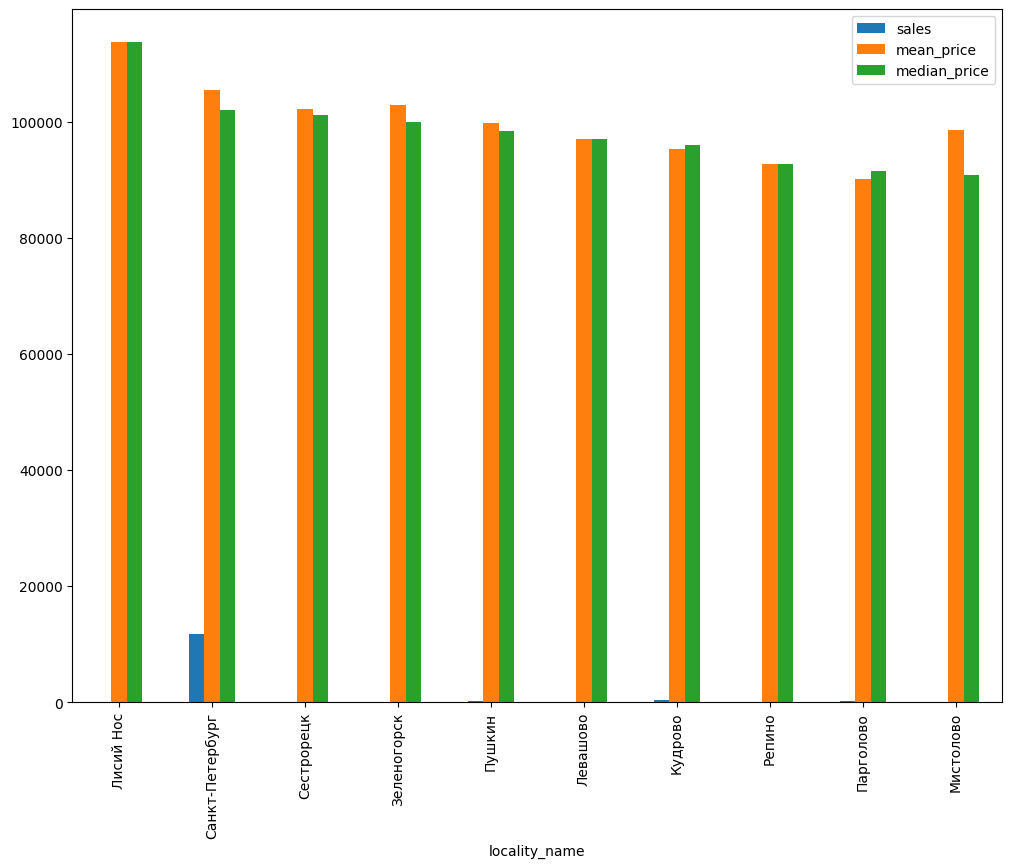

In [221]:
good_data_pivot_table.sort_values('median_price', ascending=False).head(10).plot(kind='bar', figsize=(12,9))
plt.show()

0.20977738038966068


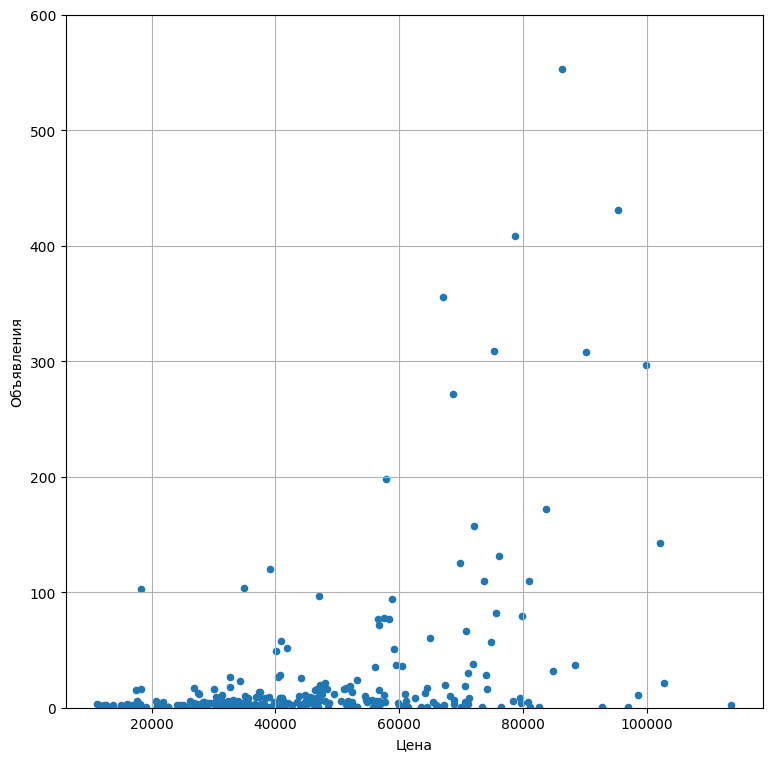

In [222]:
print(good_data_pivot_table['mean_price'].corr(good_data_pivot_table['sales']))
good_data_pivot_table.plot(x='mean_price', y='sales', kind='scatter',  
                           xlabel='Цена', ylabel='Объявления',
                           grid=True, figsize=(9, 9))
plt.ylim(0, 600)  # ограничим ось, потому что в сравнении с Санкт-Петербургом график будет выглядеть, как линия
plt.show()

Действительно, корреляция составляет `0.2`. Так как она положительная, то чем больше объявлений — тем больше цена за квадратный метр. Однако корреляция небольшая. Можно сделать косвенный вывод, что чем больше объявлений, тем больше людей живет в населенном пункте, а следовательно чем больше население, тем больше цена за квадратный метр. Данный вывод не противоречит здравому смыслу

In [223]:
good_data_pivot_table.sort_values('mean_price', ascending=False).head(5)

,sales,mean_price,median_price
locality_name,,,
Лисий Нос,2,113728.348730,113728.348730
Санкт-Петербург,11847,105574.961672,102127.659574
Зеленогорск,21,102890.466601,100000.000000
Сестрорецк,143,102171.077479,101291.512915
Пушкин,297,99880.898960,98437.500000


In [224]:
good_data_pivot_table.sort_values('mean_price', ascending=True).head(5)

,sales,mean_price,median_price
locality_name,,,
Старополье,3,11206.221198,11000.000000
Свирь,2,11481.481481,11481.481481
Вахнова Кара,1,11688.311688,11688.311688
Выскатка,2,12335.480902,12335.480902
Совхозный,2,12629.129129,12629.129129


#### Вывод:

Цена за квадратный метр зависит от количества объявлений в населенном пункте, однако эти 2 метрики не сильно коррелируют между собой. Мы вывели 5 населенных пунктов с самой большой и маленькой ценой за квадратный метр


### Средняя стоимость квартир в Санкт-Петербурге

Посмотрим, как средняя стоимость меняется в зависимости от удаления от центра. Для этого создадим сводную таблицу

In [225]:
good_data_spb_pivot_table = (good_data.query('locality_name == "Санкт-Петербург"')
                             .pivot_table(index='city_centers_nearest_km', values='price_per_sqrm',
                                          aggfunc=('mean', 'median'))
                             .reset_index())

# Выводим, отсортировав по расстоянию от центра
good_data_spb_pivot_table.sort_values('city_centers_nearest_km', ascending=True)

,city_centers_nearest_km,mean,median
0,0.0,114373.749500,108163.265306
1,1.0,122920.538559,113290.598291
2,2.0,118595.837638,115034.965035
3,3.0,111993.945553,108881.639991
4,4.0,120192.357387,116406.250000
5,5.0,125186.165248,122923.498943
6,6.0,124899.164354,119836.065574
7,7.0,117913.901254,115523.632994
8,8.0,114691.723516,111317.254174
9,9.0,107627.674013,105024.429967


-0.9263281070961095


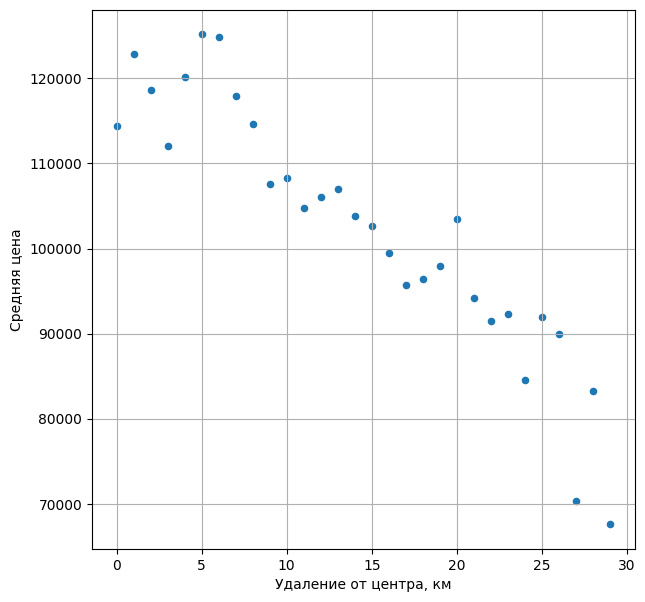

In [226]:
print(good_data_spb_pivot_table['mean'].corr(good_data_spb_pivot_table['city_centers_nearest_km']))

good_data_spb_pivot_table.plot(x='city_centers_nearest_km', y='mean',
                               kind='scatter',
                               xlabel='Удаление от центра, км', ylabel='Средняя цена',
                               grid=True, figsize=(7, 7))
plt.show()

#### Вывод:

В "хороших" данных `11847` объявлений, удаленность которых от центра доходит до 29км
<br>
Корреляция составляет `-0.784`, что означает довольно сильную взаимосвязь данных. То, что она отрицательна, означает, что по удалении от центра, цена падает, мы так же можем это наблюдать на графике. "Всплески", при которых цена возрастает по удалению от центра можно объяснить тем, что в данные входят лоты, расположенные в элитных районах, как например Крестовский остров. 

## Общий вывод

Рынок недвижимости развивается и дорожает. С каждым годом увеличивается количество объявлений и цена за квадратный метр, а сделки проходят быстрее, это косвенно говорит о росте дохода у населения, либо же об улучшении экономической ситуации в стране.  

Мы выявили, какие параметры больше всего влияют на цену объекта:
- `total_area` — Общая площадь. `living_area` `kitchen_area` являются "подпараметрами" общей площади, так что мы не учитываем конкретно их корреляцию с ценой 
- `rooms` — Количество комнат в лоте
- `ceiling_height` — высота потолков
- `city_centers_nearest` — Насколько близко лот находится к центру города
- В среднем, лоты, находящиеся на первом этаже самые дешевые. Дальше по дороговизне находятся лоты, находящиеся на последнем этаже. Самыми дорогими являются объекты, которые распологаются от второго до предпоследнего этажа. Похупатели предпочитают более высокие этажи в угоду первых, однако не любят жить на последнем этаже. Причиной, почему люди не любят жить на первых этажах, может быть шум с улицы. В случае же с последнем этажом причиной может являтся слишком долгое ожидание лифта, или же низкая скорость реагирования спецслужб

Действительно, данные параметры могут выявить "элитную" недвижимость. Так же важно отметить, что цена объекта зависит еще от того, где находится лот. Таким образом лоты в городах стоят дороже, нежели те, которые находятся в малонаселенных пунктах. Исключением является `поселок Лисий нос`, так как он является частным сектором, находящимся близко к Санкт-Петербургу.
<br><br>
Мы выявили, какие продажи являются необычайно быстрыми и долгими, что впоследствии позволит предсказать, является ли объявление подозрительным
- `Необычайно быстрыми` являются продажи, которые были завершены в пределах `39` дней
- `Необычайно долгими` являются продажи, которые были завершены от `172` дня
- В среднем лоты продаются за `121` день, однако медианным значением является `77` дней
<br><br>
Мы выявили, как цена зависит от времени. 
- Больше всего объявлений размещаются в будние дни, а быстрее всего закрываются объявления, которые были выставлены в `Воскресенье`
- Меньше всего объявлений размещаются зимой и летом. Дольше всего продаются лоты, которые были выставлены в `Апреле`, `Мае`, `Июне`
- **C течением времени спрос на недвижимость растет, а завершение сделок происходит быстрее**

<br><br> 
**Проделанная работа:**


- Пропуски были найдены в следующих столбцах:
    1. `balconies` — Пропуски в данном столбце были заменены на `0`
    2. `ceiling_height` —Пропуски в данном столбце были заменены на медианные значение высоты потолков, основываясь на населенном пункте.
    3. `days_exposition` — В данном столбце мы не смогли удалить пропуски, потому что объявления, на момент даты получения данных, еще не были сняты с публикации. Пропуски мы заменили на `-1`
    4. `floors_total` — Пропуски в данном столбце мы заменили на значения из столбца `floor`, потому что медианные значения были далеки от правды
    5. `is_apartment` — Пропуски в данном столбце мы заменили на `False`. Перед заполнением, мы дополнительно проверили, не является ли лот земельным участком
    6. `kitchen_area`— Для заполнения пропусков в данном столбце мы посчитали соотношение медианных значений общей площади и площади кухни, после чего в столбцах с пропусками домножили общую площадь на посчитанное соотношение
    7. `living_area` — Для заполнения пропусков в данном столбце мы посчитали соотношение медианных значений общей площади и жилой площади, после чего в столбцах с пропусками домножили общую площадь на посчитанное соотношение
    8. `locality_name` — Мы полностью удалили строки с пропусками. Всего было удалено `49` строк
    9. `city_centers_nearest` — В данном столбце пропуски были вызваны техническим сбоем и тем, что алгоритм после 65км не записывает значения. Данные пропуски пришлось оставить
    10. `airports_nearest` — В данном столбце пропуски были вызваны техническим сбоем и тем, что алгоритм после 85км не записывает значения. Данные пропуски пришлось оставить
    11. `parks_nearest`, `ponds_nearest` — В данном столбце пропуски были вызваны техническим сбоем и тем, что алгоритм после 3км и 1.5 км не записывает значения. Данные пропуски пришлось оставить
    12. `parks_around3000`, `ponds_around3000` — В данных столбцах мы заменили пропуски на `0`

- Мы преобразовали `59` неявных дубликатов, путем удаления префиксов у названий населенных пунктов
- Мы изменили типы данных в `6` столбцах 
    - Мы привели столбец `balcony` к `int64`, потому что не может быть 2.5 балкона
    - Мы привели столбец `floors_total` к `int64`, потому что не может быть 2.5 этажа
    - Мы привели столбец `is_apartment` к `bool`, потому что это столбец, показывающий, является ли данный лот апартаментыми, он может принимать только значения `True` и `False`
    - Мы привели столбец `days_exposition` к `int 64`, для облегчения исследовательского анализа. Для нас не важно, прошло ли 2, или 2.5 дня 
    - Мы привели столбец `first_day_exposition` к `datetime64` для корректной работы с датой
    - Мы привели столбец `last_price` к `int64`, потому что копейки не повлияют на исследовательский анализ
- Мы создали отдельный датасет, по которому будем проводить исследовательский анализ данных. Мы обработали выбросы в следующих столбцах: `ceiling_height`, `days_exposition`, `floor`, `total_area`, `last_price`. Эти столбцы являются для нас критически важными для анализа, на выбросы в остальных столбцах мы можем не обращать внимания.
<br>
В датасете с данными, пригодными для анализа у нас осталось `18973` строк, что является `80%` от количества строк в изначальном датасете
- Мы добавили 6 новых столбцов, которые помогут нам при анализе
    - `price_per_sqrm`, `city_centers_nearest_km` — позволит узнать, как меняется цена за квадратный метр в зависимости от населенного пункта, удаления от центра города
    - `weekday_exposition` – позволит узнать, как день публикации влияет на скорость продажи квартир. Если бы у нас были данные по количеству просмотров объявления, то мы могли бы узнать, как день недели влияет и на эту метрику
    - `month_exposition` – позволит узнать, как варьируется цена в зависимости от времени года, и как оно влияет на скорость продажи
    - `year_exposition` – позволит узнать, как менялась цена по годам
    - `floor_type` – позволит узнать, как этаж влияет на стоимость квартиры